# Goal

I want to know the correlations between the features available and what are the factors that beneficiate the success of the customer service.

## Setup

In [279]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib
import numpy as np
import seaborn as sns 

In [ ]:
print(os.getcwd())

In [639]:
df = pd.read_csv("../data/raw/Customer_support_data.csv")
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [641]:
# Standardize column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Replace spaces with underscores
df.columns = df.columns.str.replace('-', '_', regex=False)  # Replace hyphens with underscores

# Check updated column names
print("Updated Column Names:")
print(df.columns)


Updated Column Names:
Index(['unique_id', 'channel_name', 'category', 'sub_category',
       'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at',
       'issue_responded', 'survey_response_date', 'customer_city',
       'product_category', 'item_price', 'connected_handling_time',
       'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift',
       'csat_score'],
      dtype='object')


In [498]:
print(df[["issue_reported_at", "issue_responded", "survey_response_date"]].head(5))

  issue_reported_at   issue_responded survey_response_date
0  01/08/2023 11:13  01/08/2023 11:47            01-Aug-23
1  01/08/2023 12:52  01/08/2023 12:54            01-Aug-23
2  01/08/2023 20:16  01/08/2023 20:38            01-Aug-23
3  01/08/2023 20:56  01/08/2023 21:16            01-Aug-23
4  01/08/2023 10:30  01/08/2023 10:32            01-Aug-23


## Data Overview

In [ ]:
df.head()

In [ ]:
df.describe().T

In [ ]:
df.info()

### Most common values

In [ ]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts().head())
    print("-" * 30)

# Data cleaning

In [643]:
df_prep = df 

### Missing Data

In [644]:
missing_data_output = []

for col in df_prep.columns:
    missing_count = df_prep[col].isnull().sum()
    percent_missing = (missing_count / len(df_prep)) * 100
    missing_data_output.append(f'{col} - {missing_count} - {round(percent_missing, 2)}%')

# Output the result
missing_data_output

['unique_id - 0 - 0.0%',
 'channel_name - 0 - 0.0%',
 'category - 0 - 0.0%',
 'sub_category - 0 - 0.0%',
 'customer_remarks - 57165 - 66.54%',
 'order_id - 18232 - 21.22%',
 'order_date_time - 68693 - 79.96%',
 'issue_reported_at - 0 - 0.0%',
 'issue_responded - 0 - 0.0%',
 'survey_response_date - 0 - 0.0%',
 'customer_city - 68828 - 80.12%',
 'product_category - 68711 - 79.98%',
 'item_price - 68701 - 79.97%',
 'connected_handling_time - 85665 - 99.72%',
 'agent_name - 0 - 0.0%',
 'supervisor - 0 - 0.0%',
 'manager - 0 - 0.0%',
 'tenure_bucket - 0 - 0.0%',
 'agent_shift - 0 - 0.0%',
 'csat_score - 0 - 0.0%']

The most concerning columns with many null values are:
1. customer_remarks
2. order_date_time
3. customer_city
4. item_price
5. connected_handling_time

### Handling Customer_City, Product_category, Item_price

In [645]:
# Replacing missing values
df_prep['customer_city'].fillna('Unknown', inplace=True)
df_prep['product_category'].fillna("Miscellaneous", inplace=True)


/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/4282217862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['customer_city'].fillna('Unknown', inplace=True)
/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/4282217862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

### Handling Customer Remarks

In [646]:
df_prep["customer_remarks"].unique()

array([nan, 'Very good',
       "Shopzilla app and it's all coustomer care services is very good service provided all time",
       ...,
       "Trough the Shopzilla App Refunding Policy should be easier and stepwise successful so that a customer need not communicate with the customer care; 'Return and Refund' must be 100% feasible through the App.",
       'Supported team customer executive   good',
       'need to improve with proper details.'],
      shape=(18232,), dtype=object)

since this column is about sentiment for the service, we'll leave this since it will be useful for sentiment analysis despite its many null values.

### Handling other concerning or irrelevant columns

In [502]:
df_prep[["connected_handling_time", "order_id", "unique_id"]].isna().sum()

connected_handling_time    85665
order_id                   18232
unique_id                      0
dtype: int64

For its total of missing values it's better to be dropped.

In [647]:
df_prep.drop(columns = ["connected_handling_time", "order_id", "unique_id"], inplace= True)

### Dropping null values

In [648]:
df_prep = df_prep.dropna(how='any')

In [649]:
missing_data_output = []

for col in df_prep.columns:
    missing_count = df_prep[col].isnull().sum()
    percent_missing = (missing_count / len(df_prep)) * 100
    missing_data_output.append(f'{col} - {missing_count} - {round(percent_missing, 2)}%')

# Output the result
missing_data_output

['channel_name - 0 - 0.0%',
 'category - 0 - 0.0%',
 'sub_category - 0 - 0.0%',
 'customer_remarks - 0 - 0.0%',
 'order_date_time - 0 - 0.0%',
 'issue_reported_at - 0 - 0.0%',
 'issue_responded - 0 - 0.0%',
 'survey_response_date - 0 - 0.0%',
 'customer_city - 0 - 0.0%',
 'product_category - 0 - 0.0%',
 'item_price - 0 - 0.0%',
 'agent_name - 0 - 0.0%',
 'supervisor - 0 - 0.0%',
 'manager - 0 - 0.0%',
 'tenure_bucket - 0 - 0.0%',
 'agent_shift - 0 - 0.0%',
 'csat_score - 0 - 0.0%']

### Removing Duplicates

In [442]:
# Identify duplicate rows
duplicates = df_prep.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows (if any)
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 0
      channel_name           category              sub_category  \
9242       Inbound      Order Related         Installation/demo   
12002      Inbound            Returns    Reverse Pickup Enquiry   
16899      Inbound   Payments related            e-Gift Voucher   
53253      Outcall   Payments related   Payment related Queries   
58444      Outcall  Shopzilla Related  Shopzila Premium Related   
61792        Email            Returns    Reverse Pickup Enquiry   
77516        Email      Order Related           Unable to track   
79734        Email            Returns    Reverse Pickup Enquiry   
85501        Email      Order Related                   Delayed   

      customer_remarks   order_date_time issue_reported_at   issue_responded  \
9242               NaN               NaN  04/08/2023 09:54  04/08/2023 10:00   
12002              NaN  01/08/2023 20:03  05/08/2023 09:15  05/08/2023 09:26   
16899              NaN               NaN  07/08/2023 22:05  0

In [443]:
df_prep.drop_duplicates()


,channel_name,category,sub_category,customer_remarks,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
11,Inbound,Order Related,Delayed,Very bad,19/07/2023 23:50,02/08/2023 10:44,02/08/2023 11:14,02-Aug-23,NAGPUR,LifeStyle,434.0,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1
19,Inbound,Order Related,Installation/demo,All good,18/07/2023 12:20,02/08/2023 20:03,02/08/2023 20:05,02-Aug-23,NAGPUR,Electronics,15990.0,David Butler,Olivia Wang,Emily Chen,31-60,Evening,5
25,Inbound,Order Related,Order status enquiry,Issue not resolved pathetic service,29/07/2023 13:35,02/08/2023 11:07,02/08/2023 11:10,02-Aug-23,NEW DELHI,Mobile,99999.0,Michelle Williams,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,1
27,Inbound,Returns,Fraudulent User,Excellent,25/07/2023 13:49,02/08/2023 21:06,02/08/2023 21:07,02-Aug-23,FARIDABAD,LifeStyle,664.0,Wendy Taylor,Madison Kim,Michael Lee,31-60,Evening,5
37,Inbound,Order Related,Order status enquiry,I am very disappointed with Shopzilla.The issu...,19/07/2023 00:11,01/08/2023 00:54,01/08/2023 01:05,01-Aug-23,KANYAKUMARI,Furniture,11159.0,Charles Williamson,Logan Lee,Emily Chen,0-30,Evening,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85792,Inbound,Returns,Reverse Pickup Enquiry,Muje baat kar ke bahut aap se aap thanks ????,06/08/2023 18:40,31/08/2023 21:07,31/08/2023 21:10,31-Aug-23,MUNGAOLI,LifeStyle,549.0,Sarah Newton,Zoe Yamamoto,Olivia Tan,>90,Morning,5
85801,Outcall,Order Related,Delayed,Very Happy,18/08/2023 17:05,31/08/2023 16:58,31/08/2023 17:01,31-Aug-23,BHAGALPUR,Books & General merchandise,126.0,Diana White,Layla Taniguchi,Emily Chen,>90,Morning,5
85832,Inbound,Order Related,Delayed,Ok,19/08/2023 16:14,30/08/2023 16:01,31/08/2023 06:55,31-Aug-23,JAMSHEDPUR,LifeStyle,173.0,Bruce Smith,Elijah Yamaguchi,Michael Lee,61-90,Afternoon,4
85869,Inbound,Refund Related,Refund Enquiry,Thanx,20/08/2023 01:44,31/08/2023 19:23,31/08/2023 19:33,31-Aug-23,MUZAFFARPUR,LifeStyle,497.0,Nicole Cummings,Jackson Park,John Smith,>90,Morning,5


In [444]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5822 entries, 11 to 85881
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channel_name          5822 non-null   object 
 1   category              5822 non-null   object 
 2   sub_category          5822 non-null   object 
 3   customer_remarks      5822 non-null   object 
 4   order_date_time       5822 non-null   object 
 5   issue_reported_at     5822 non-null   object 
 6   issue_responded       5822 non-null   object 
 7   survey_response_date  5822 non-null   object 
 8   customer_city         5822 non-null   object 
 9   product_category      5822 non-null   object 
 10  item_price            5822 non-null   float64
 11  agent_name            5822 non-null   object 
 12  supervisor            5822 non-null   object 
 13  manager               5822 non-null   object 
 14  tenure_bucket         5822 non-null   object 
 15  agent_shift           58

### Checking Data types

In [445]:
print(df_prep.dtypes)

channel_name             object
category                 object
sub_category             object
customer_remarks         object
order_date_time          object
issue_reported_at        object
issue_responded          object
survey_response_date     object
customer_city            object
product_category         object
item_price              float64
agent_name               object
supervisor               object
manager                  object
tenure_bucket            object
agent_shift              object
csat_score                int64
dtype: object


In [446]:
df_prep[["order_date_time", "issue_reported_at", "issue_responded", "survey_response_date"]].head()

,order_date_time,issue_reported_at,issue_responded,survey_response_date
11,19/07/2023 23:50,02/08/2023 10:44,02/08/2023 11:14,02-Aug-23
19,18/07/2023 12:20,02/08/2023 20:03,02/08/2023 20:05,02-Aug-23
25,29/07/2023 13:35,02/08/2023 11:07,02/08/2023 11:10,02-Aug-23
27,25/07/2023 13:49,02/08/2023 21:06,02/08/2023 21:07,02-Aug-23
37,19/07/2023 00:11,01/08/2023 00:54,01/08/2023 01:05,01-Aug-23


### Changing CSAT Score Data type

In [650]:
df_prep["csat_score"] = df_prep["csat_score"].astype(float)

/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/1749503967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep["csat_score"] = df_prep["csat_score"].astype(float)


In [452]:
df_prep["csat_score"].dtypes

dtype('float64')

In [451]:
df_prep["csat_score"].head()

11    1.0
19    5.0
25    1.0
27    5.0
37    3.0
Name: csat_score, dtype: float64

### Feature Engineering

In [651]:
# 1. Force day/month/year parsing
df_prep['issue_responded'] = pd.to_datetime(
    df_prep['issue_responded'], dayfirst=True, errors='coerce'
)
df_prep['issue_reported_at'] = pd.to_datetime(
    df_prep['issue_reported_at'], dayfirst=True, errors='coerce'
)
df_prep['survey_response_date'] = pd.to_datetime(
    df_prep['survey_response_date'], dayfirst=True, errors='coerce'
)

# 2. Calculate Resolution Time (in hours)
df_prep['resolution_time'] = (
    df_prep['issue_responded'] - df_prep['issue_reported_at']
).dt.total_seconds() / 3600

# 3. Set Survey_response_Date to the end of the day
df_prep['survey_response_date'] += pd.Timedelta(hours=23, minutes=59, seconds=59)

# 4. Recalculate Survey_Delay (in hours)
df_prep['survey_delay'] = (
    df_prep['survey_response_date'] - df_prep['issue_responded']
).dt.total_seconds() / 3600


/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/3762540128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['issue_responded'] = pd.to_datetime(
/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/3762540128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['issue_reported_at'] = pd.to_datetime(
/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/3762540128.py:8: UserWarning: Could not infer format, so each element will be parsed individually, 

In [608]:
# Verify if any rows have a negative resolution_time
invalid_rows = df_prep[df_prep['resolution_time'] < 0]

# Print invalid rows for verification
print("Invalid rows (negative resolution_time):")
print(invalid_rows[[
    'issue_reported_at',
    'issue_responded',
    'survey_response_date',
    'resolution_time',
    'survey_delay'
]])


Invalid rows (negative resolution_time):
        issue_reported_at issue_responded survey_response_date  \
74185 2023-08-28 16:28:00      2023-08-28  2023-08-28 23:59:59   
74219 2023-08-28 08:39:00      2023-08-28  2023-08-28 23:59:59   
74232 2023-08-28 15:39:00      2023-08-28  2023-08-28 23:59:59   
74419 2023-08-28 09:27:00      2023-08-28  2023-08-28 23:59:59   
74420 2023-08-28 23:56:00      2023-08-28  2023-08-28 23:59:59   
...                   ...             ...                  ...   
77483 2023-08-28 17:39:00      2023-08-28  2023-08-28 23:59:59   
77525 2023-08-28 20:49:00      2023-08-28  2023-08-28 23:59:59   
77555 2023-08-28 13:36:00      2023-08-28  2023-08-28 23:59:59   
77563 2023-08-28 09:31:00      2023-08-28  2023-08-28 23:59:59   
77564 2023-08-28 19:19:00      2023-08-28  2023-08-28 23:59:59   

       resolution_time  survey_delay  
74185       -16.466667     23.999722  
74219        -8.650000     23.999722  
74232       -15.650000     23.999722  
74419     

In [652]:
# Set resolution_time to NaN if it is negative
df_prep.loc[df_prep['resolution_time'] < 0, 'resolution_time'] = np.nan
# Set survey_delay to NaN if it is negative
df_prep.loc[df_prep['survey_delay'] < 0, 'survey_delay'] = np.nan

In [653]:
# Verify if any rows have a negative resolution_time
invalid_rows = df_prep[df_prep['resolution_time'] < 0]

# Print invalid rows for verification
print("Invalid rows (negative resolution_time):")
print(invalid_rows[[
    'issue_reported_at',
    'issue_responded',
    'survey_response_date',
    'resolution_time',
    'survey_delay'
]])


Invalid rows (negative resolution_time):
Empty DataFrame
Columns: [issue_reported_at, issue_responded, survey_response_date, resolution_time, survey_delay]
Index: []


In [654]:
# Define a minimum threshold for resolution time (e.g., 0.1 hours or 6 minutes)
min_resolution_time = 0.1  # Adjust as per business logic

# Filter data
df_prep = df_prep[df_prep['resolution_time'] > min_resolution_time]

# Print the count of rows removed
print(f"Rows removed with resolution time <= {min_resolution_time}: {len(df_prep[df_prep['resolution_time'] <= min_resolution_time])}")

# Re-calculate the metrics or re-plot the charts with the filtered data


Rows removed with resolution time <= 0.1: 0


In [655]:
# Ensure 'order_date_time' is in datetime format
df_prep['order_date_time'] = pd.to_datetime(df_prep['order_date_time'], errors='coerce')

# Extract year and month from 'order_date_time'
df_prep['order_year'] = df_prep['order_date_time'].dt.year
df_prep['order_month'] = df_prep['order_date_time'].dt.month

# Verify the new columns
print(df_prep[['order_date_time', 'order_year', 'order_month']].head())


        order_date_time  order_year  order_month
11  2023-07-19 23:50:00        2023            7
37  2023-07-19 00:11:00        2023            7
73  2023-07-26 12:04:00        2023            7
89  2023-07-20 23:03:00        2023            7
129 2023-06-19 17:37:00        2023            6


/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/87105853.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_prep['order_date_time'] = pd.to_datetime(df_prep['order_date_time'], errors='coerce')


In [656]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3048 entries, 11 to 85869
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          3048 non-null   object        
 1   category              3048 non-null   object        
 2   sub_category          3048 non-null   object        
 3   customer_remarks      3048 non-null   object        
 4   order_date_time       3048 non-null   datetime64[ns]
 5   issue_reported_at     3048 non-null   datetime64[ns]
 6   issue_responded       3048 non-null   datetime64[ns]
 7   survey_response_date  3048 non-null   datetime64[ns]
 8   customer_city         3048 non-null   object        
 9   product_category      3048 non-null   object        
 10  item_price            3048 non-null   float64       
 11  agent_name            3048 non-null   object        
 12  supervisor            3048 non-null   object        
 13  manager              

# EDA

## Dataset overview

In [626]:
print(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3048 entries, 11 to 85869
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          3048 non-null   object        
 1   category              3048 non-null   object        
 2   sub_category          3048 non-null   object        
 3   customer_remarks      3048 non-null   object        
 4   order_date_time       3048 non-null   datetime64[ns]
 5   issue_reported_at     3048 non-null   datetime64[ns]
 6   issue_responded       3048 non-null   datetime64[ns]
 7   survey_response_date  3048 non-null   datetime64[ns]
 8   customer_city         3048 non-null   object        
 9   product_category      3048 non-null   object        
 10  item_price            3048 non-null   float64       
 11  agent_name            3048 non-null   object        
 12  supervisor            3048 non-null   object        
 13  manager              

Feature Types:

This dataset has 85907 rows and 19 columns.
The dataset has a mix of categorical, numerical, and datetime columns.
- Categorical columns: channel_name, category, Sub-category, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift
- Numerical columns: Item_price, CSAT Score, Resolution_Time, Survey_Delay.
- Datetime columns: Issue_reported at, issue_responded, Survey_response_Date.

columns with missing values:
- Order_id

In [627]:
print(df_prep.describe(include='all'))  # Summary statistics for numerical and categorical data


       channel_name category            sub_category customer_remarks  \
count          3048     3048                    3048             3048   
unique            3       10                      40             2398   
top         Inbound  Returns  Reverse Pickup Enquiry            Good    
freq           2451     1522                     758              128   
mean            NaN      NaN                     NaN              NaN   
min             NaN      NaN                     NaN              NaN   
25%             NaN      NaN                     NaN              NaN   
50%             NaN      NaN                     NaN              NaN   
75%             NaN      NaN                     NaN              NaN   
max             NaN      NaN                     NaN              NaN   
std             NaN      NaN                     NaN              NaN   

                      order_date_time              issue_reported_at  \
count                            3048              

### Distribution Visualization

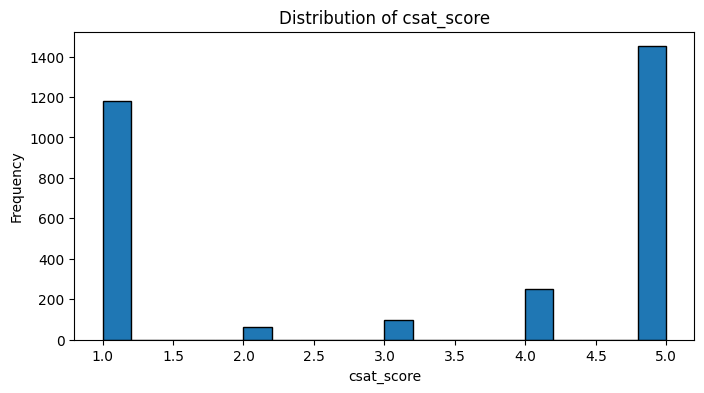

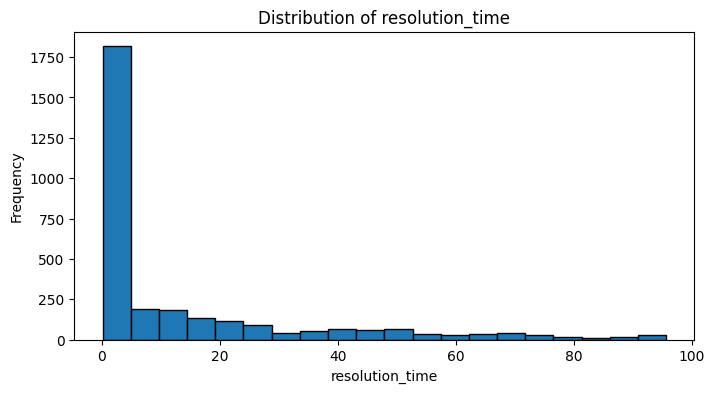

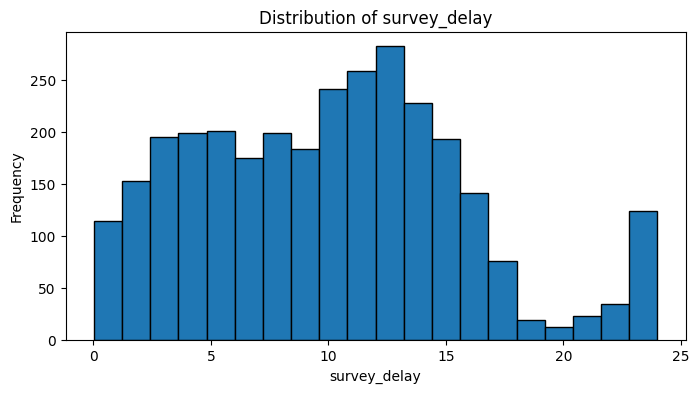

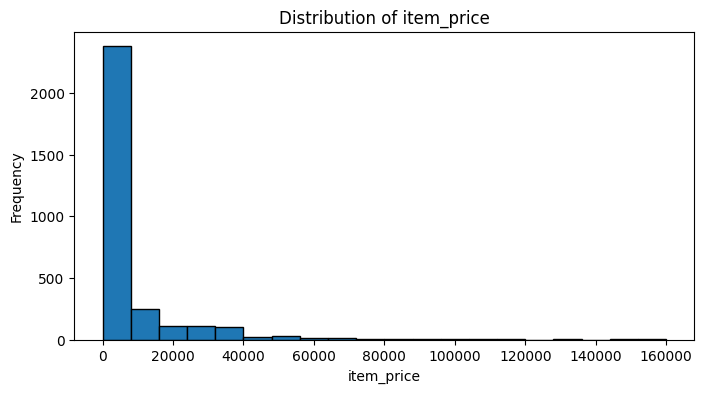

In [657]:
# Plot histograms for numerical variables
numerical_cols = ['csat_score', 'resolution_time', 'survey_delay', 'item_price']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df_prep[col], bins=20, edgecolor='k')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Correlation Matrix

In [632]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3048 entries, 11 to 85869
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          3048 non-null   object        
 1   category              3048 non-null   object        
 2   sub_category          3048 non-null   object        
 3   customer_remarks      3048 non-null   object        
 4   order_date_time       3048 non-null   datetime64[ns]
 5   issue_reported_at     3048 non-null   datetime64[ns]
 6   issue_responded       3048 non-null   datetime64[ns]
 7   survey_response_date  3048 non-null   datetime64[ns]
 8   customer_city         3048 non-null   object        
 9   product_category      3048 non-null   object        
 10  item_price            3048 non-null   float64       
 11  agent_name            3048 non-null   object        
 12  supervisor            3048 non-null   object        
 13  manager              

In [658]:
df_prep.describe()

,order_date_time,issue_reported_at,issue_responded,survey_response_date,item_price,csat_score,resolution_time,survey_delay,order_year,order_month
count,3048,3048,3048,3048,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,2023-07-26 18:57:28.641732352,2023-08-14 19:24:30.334645760,2023-08-15 08:43:40.866141952,2023-08-15 18:45:48.606299648,6974.791667,3.238189,13.319592,10.035483,2022.989501,7.523622
min,2022-01-18 20:45:00,2023-07-28 20:42:00,2023-08-01 00:17:00,2023-08-01 23:59:59,1.000000,1.000000,0.116667,0.016389,2022.000000,1.000000
25%,2023-07-25 21:08:30,2023-08-09 08:39:15,2023-08-09 18:57:30,2023-08-09 23:59:59,421.000000,1.000000,0.316667,5.416389,2023.000000,7.000000
50%,2023-08-04 09:58:00,2023-08-13 15:33:00,2023-08-14 00:37:30,2023-08-14 23:59:59,1085.000000,4.000000,1.966667,10.166389,2023.000000,8.000000
75%,2023-08-09 10:20:30,2023-08-20 10:54:30,2023-08-21 09:32:30,2023-08-21 23:59:59,5141.000000,5.000000,17.670833,13.683056,2023.000000,8.000000
max,2023-12-08 12:21:00,2023-08-31 21:21:00,2023-08-31 23:26:00,2023-08-31 23:59:59,159990.000000,5.000000,95.700000,23.999722,2023.000000,12.000000
std,NaN,NaN,NaN,NaN,14458.371353,1.871230,21.117445,5.662183,0.101941,0.923084


columns will be correlated to CSAT Score are:
channel_name, category, Sub-category, Customer_City, Product_category, Item_price, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, order_year, order_month, Resolution_Time, Survey_Delay, CSAT Score

In [663]:
# Initialize a DataFrame for numerized data
df_numerized = pd.DataFrame()

# Columns to encode (categorical)
columns_to_encode = [
    'channel_name', 'category', 'sub_category', 'customer_city', 
    'product_category', 'agent_name', 'supervisor', 'manager', 
    'tenure_bucket', 'agent_shift', 'order_year', 'order_month',
]

# Encode categorical columns and add to df_numerized
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df_numerized[col] = le.fit_transform(df_prep[col])
    label_encoders[col] = le

# Add existing numerical columns directly to df_numerized
numerical_columns = [ 
    'item_price', 
    'resolution_time', 
    'survey_delay', 
    'csat_score'
]

df_numerized = pd.concat([df_numerized, df_prep[numerical_columns]], axis=1)


# Verify the new df_numerized
print("Numerized DataFrame:")
print(df_numerized.head())

Numerized DataFrame:
   channel_name  category  sub_category  customer_city  product_category  \
0           1.0       3.0           7.0          523.0               7.0   
1           1.0       3.0          17.0          385.0               3.0   
2           1.0       7.0          25.0          586.0               9.0   
3           1.0       1.0          35.0          311.0               2.0   
4           1.0       8.0          31.0          204.0               6.0   

   agent_name  supervisor  manager  tenure_bucket  agent_shift  order_year  \
0       970.0        16.0      0.0            3.0          4.0         1.0   
1       168.0        23.0      0.0            0.0          1.0         1.0   
2       477.0         1.0      2.0            3.0          2.0         1.0   
3      1017.0         6.0      3.0            3.0          0.0         1.0   
4       346.0        23.0      0.0            2.0          1.0         1.0   

   order_month  item_price  resolution_time  survey_d

In [660]:
print(df_prep['order_year'].unique())
print(df_prep['order_year'].value_counts(dropna=False))


[2023 2022]
order_year
2023    3016
2022      32
Name: count, dtype: int64


In [664]:
df_numerized['order_year'].dtype
df_numerized['order_year'].unique()


array([ 1.,  0., nan])

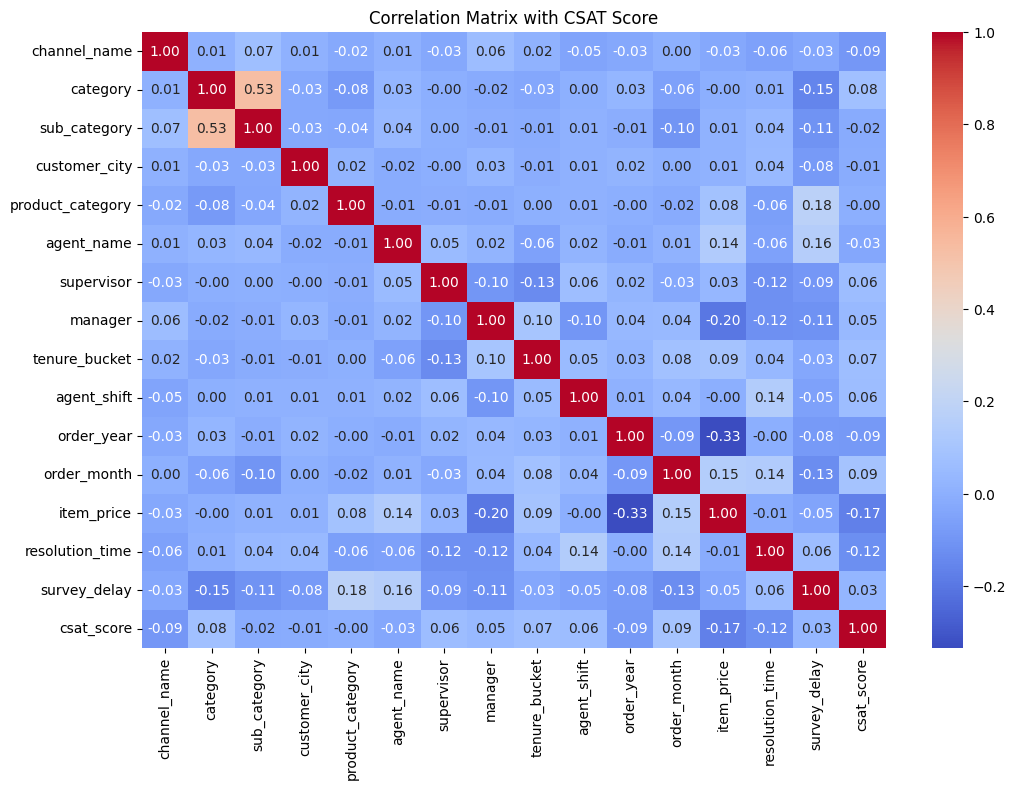

In [665]:
# Calculate the correlation matrix
correlation_matrix = df_numerized.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix with CSAT Score")
plt.show()

# Business Questions

- Which cities perform best in terms of customer satisfaction?
- How efficient is Customer Support in resolving issues?
- Which issue categories need improvement?
- How does the choice of communication channel affect performance?
- What trends can be observed in CSAT performance over time?

### Which cities perform best in terms of customer satisfaction?

/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/1219119665.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resolution_avg = city_metrics.groupby('CSAT Range')['resolution_time'].mean().sort_index()


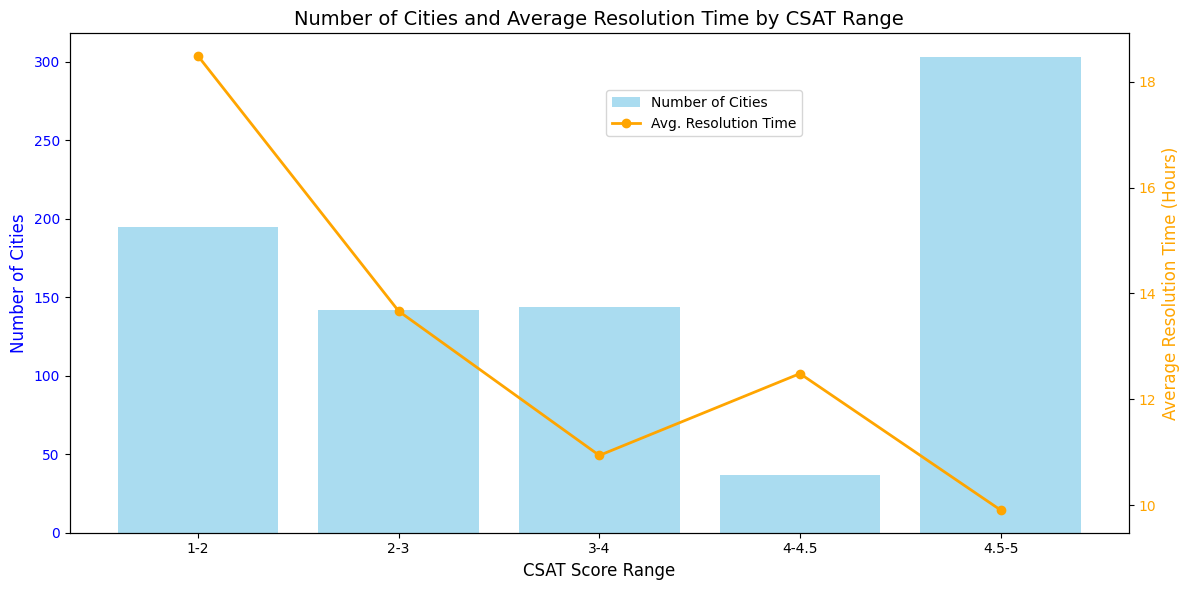

In [551]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group cities by their average CSAT scores and resolution times
city_metrics = df_prep.groupby('customer_city').agg({'csat_score': 'mean', 'resolution_time': 'mean'}).reset_index()

# Define CSAT ranges
bins = [1, 2, 3, 4, 4.5, 5]
labels = ["1-2", "2-3", "3-4", "4-4.5", "4.5-5"]
city_metrics['CSAT Range'] = pd.cut(city_metrics['csat_score'], bins=bins, labels=labels, include_lowest=True)

# Count the number of cities in each range
range_counts = city_metrics['CSAT Range'].value_counts().sort_index()

# Calculate the average resolution time for each CSAT range
resolution_avg = city_metrics.groupby('CSAT Range')['resolution_time'].mean().sort_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of cities
ax1.bar(range_counts.index, range_counts.values, color='skyblue', label='Number of Cities', alpha=0.7)
ax1.set_xlabel("CSAT Score Range", fontsize=12)
ax1.set_ylabel("Number of Cities", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Number of Cities and Average Resolution Time by CSAT Range", fontsize=14)

# Line plot for average resolution time
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(resolution_avg.index, resolution_avg.values, color='orange', marker='o', label='Avg. Resolution Time', linewidth=2)
ax2.set_ylabel("Average Resolution Time (Hours)", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.5, 0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


- The majority of cities fall within the highest CSAT score range (4.5–5), reflecting excellent customer satisfaction across most locations.
- However, a significant number of cities are in the moderate range (3–4), indicating room for improvement. 
- Cities with low scores (1–2 and 2–3) are few but require targeted efforts to address potential issues.

/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/4251368523.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survey_delay_avg = city_metrics.groupby('CSAT Range')['survey_delay'].mean().sort_index()


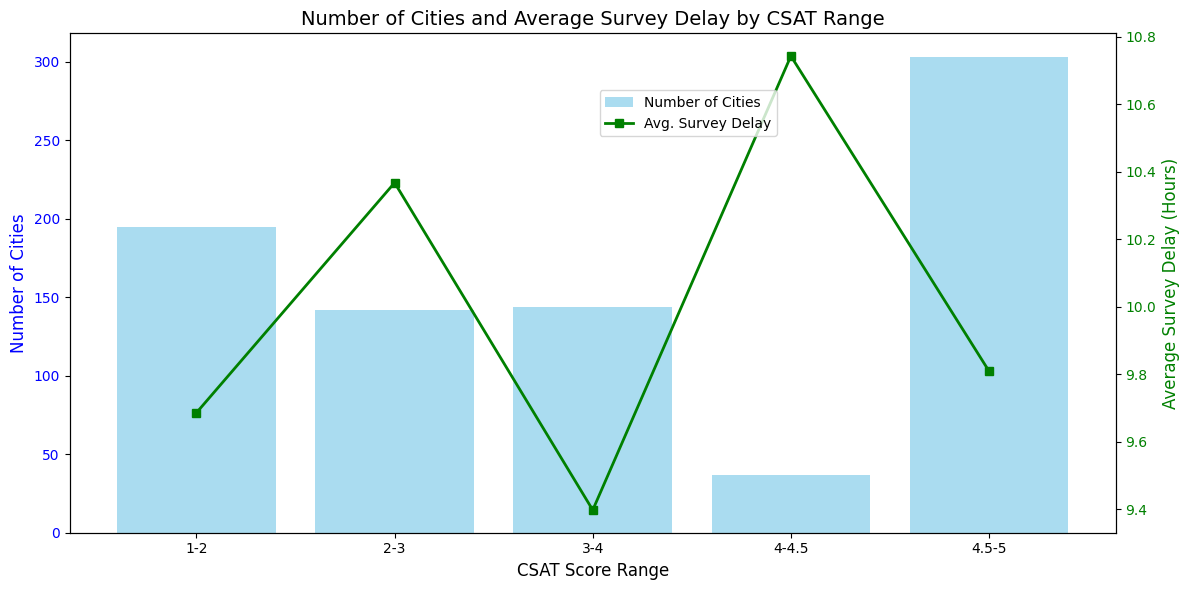

In [666]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group cities by their average CSAT scores and survey delays
city_metrics = df_prep.groupby('customer_city').agg({
    'csat_score': 'mean', 
    'survey_delay': 'mean'
}).reset_index()

# Define CSAT ranges
bins = [1, 2, 3, 4, 4.5, 5]
labels = ["1-2", "2-3", "3-4", "4-4.5", "4.5-5"]
city_metrics['CSAT Range'] = pd.cut(city_metrics['csat_score'], bins=bins, labels=labels, include_lowest=True)

# Count the number of cities in each range
range_counts = city_metrics['CSAT Range'].value_counts().sort_index()

# Calculate the average survey delay for each CSAT range
survey_delay_avg = city_metrics.groupby('CSAT Range')['survey_delay'].mean().sort_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of cities
ax1.bar(range_counts.index, range_counts.values, color='skyblue', label='Number of Cities', alpha=0.7)
ax1.set_xlabel("CSAT Score Range", fontsize=12)
ax1.set_ylabel("Number of Cities", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Number of Cities and Average Survey Delay by CSAT Range", fontsize=14)

# Line plot for average survey delay
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(survey_delay_avg.index, survey_delay_avg.values, color='green', marker='s', label='Avg. Survey Delay', linewidth=2)
ax2.set_ylabel("Average Survey Delay (Hours)", fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.5, 0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


- Despite the highest number of cities in the 4.5-5 CSAT range, survey delays are significantly higher compared to other ranges.
- A sharp decline in survey delay is observed in the 4-4.5 CSAT range, indicating better response efficiency for cities in this range.
- Lower CSAT ranges (e.g., 1-2, 2-3) also show high survey delays, indicating inefficiency in addressing low satisfaction cases.
- Focus on reducing survey delays for high-performing cities (CSAT 4.5-5) to maintain high satisfaction rates.


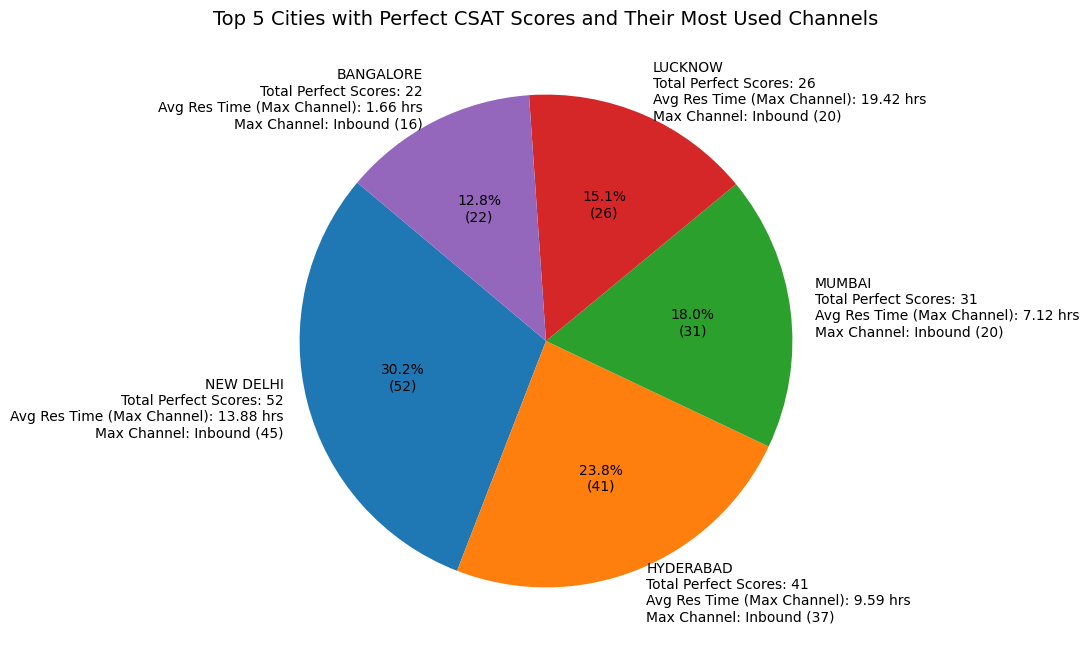

In [667]:
import matplotlib.pyplot as plt

# Filter data for perfect CSAT scores (CSAT Score == 5)
perfect_csat = df_prep[df_prep['csat_score'] == 5]

# Count the number of perfect scores for each city
top_cities = perfect_csat['customer_city'].value_counts().head(5).index

# Calculate additional stats for top cities
city_stats = perfect_csat[perfect_csat['customer_city'].isin(top_cities)].groupby('customer_city').agg(
    total_scores=('customer_city', 'size'),
    max_channel=('channel_name', lambda x: x.value_counts().idxmax()),
    max_channel_count=('channel_name', lambda x: x.value_counts().max())
)

# Calculate average resolution time for the max channel in each city
city_stats['avg_res_time_max_channel'] = city_stats.apply(
    lambda row: perfect_csat[
        (perfect_csat['customer_city'] == row.name) & 
        (perfect_csat['channel_name'] == row['max_channel'])
    ]['resolution_time'].mean(),
    axis=1
)

# Sort by total perfect scores in descending order
city_stats = city_stats.sort_values('total_scores', ascending=False)

# Prepare labels with additional stats
labels = [
    f"{city}\nTotal Perfect Scores: {row.total_scores}\nAvg Res Time (Max Channel): {row.avg_res_time_max_channel:.2f} hrs\nMax Channel: {row.max_channel} ({row.max_channel_count})"
    for city, row in city_stats.iterrows()
]

# Plot a pie chart
plt.figure(figsize=(10, 8))

def autopct_with_count(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({absolute})'

plt.pie(
    city_stats['total_scores'],
    labels=labels,
    autopct=lambda pct: autopct_with_count(pct, city_stats['total_scores']),
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Top 5 Cities with Perfect CSAT Scores and Their Most Used Channels', fontsize=14)
plt.show()


- Inbound channels dominate across all cities, contributing significantly to perfect CSAT scores.
- Resolution time efficiency varies widely, with Hyderabad performing best and Mumbai showing the greatest need for improvement.

#### Actionable Insights

- New Delhi leads with the highest perfect CSAT scores (28) and has a dominant inbound channel usage. However, the average resolution time (211.99 hours) can still be optimized to further strengthen its performance.
- Cities with higher CSAT scores (4.5-5) tend to have higher survey delays. Efforts should be made to reduce survey delays while maintaining high satisfaction levels.
- Cities in the 4.5-5 CSAT range show significantly lower average resolution times, reinforcing the importance of swift issue resolution in enhancing satisfaction.
- For cities in lower CSAT ranges (1-2 and 2-3), prioritize reducing both resolution times and survey delays as these metrics correlate with dissatisfaction.
- Across all top-performing cities, inbound channels dominate. This suggests a potential area to analyze whether specific channel strategies can be expanded to improve performance in other cities.

### How efficient is Customer Support in resolving issues?

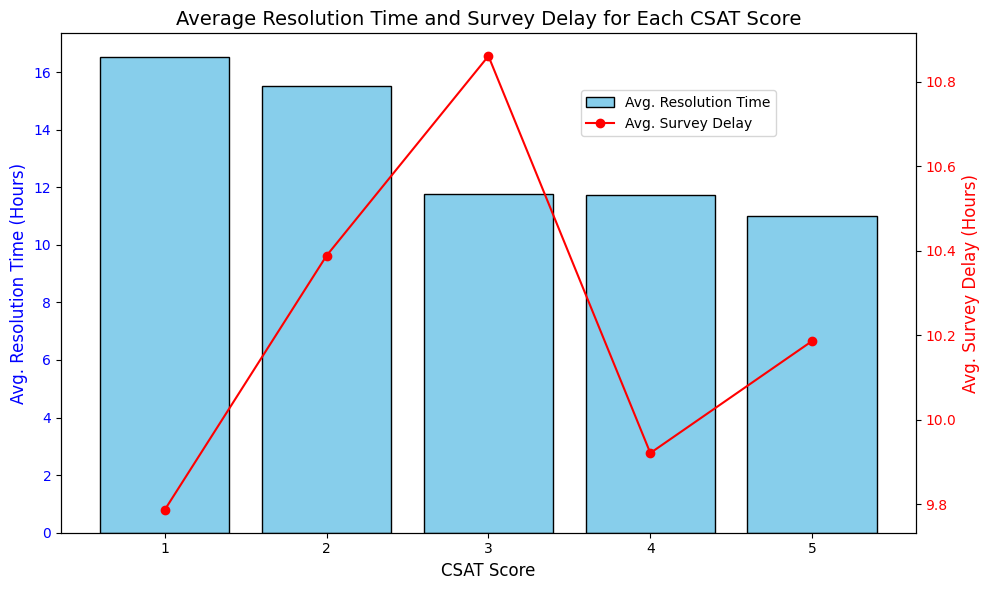

In [676]:
import pandas as pd
import matplotlib.pyplot as plt

# Segment Resolution_Time into bins
bins = [0, 1, 3, 5, 10, float('inf')]
labels = ['0-1', '1-3', '3-5', '5-10', '10+']
df_prep['Resolution_Time_Segment'] = pd.cut(df_prep['resolution_time'], bins=bins, labels=labels)

# Calculate the average Resolution_Time and Survey_Delay for each CSAT Score
resolution_avg = df_prep.groupby('csat_score')['resolution_time'].mean()
survey_delay_avg = df_prep.groupby('csat_score')['survey_delay'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Resolution_Time on the primary y-axis
ax1.bar(resolution_avg.index, resolution_avg.values, color='skyblue', edgecolor='black', label='Avg. Resolution Time')
ax1.set_xlabel("CSAT Score", fontsize=12)
ax1.set_ylabel("Avg. Resolution Time (Hours)", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Average Resolution Time and Survey Delay for Each CSAT Score", fontsize=14)

# Add Survey_Delay to the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(survey_delay_avg.index, survey_delay_avg.values, color='red', marker='o', label='Avg. Survey Delay')
ax2.set_ylabel("Avg. Survey Delay (Hours)", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(0.6, 0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


- Inverse Relationship: Lower CSAT scores are associated with higher average resolution times, indicating delays in resolving issues impact customer satisfaction negatively.

- Survey Delay Consistency: Despite varying CSAT scores, average survey delay remains relatively consistent, suggesting that response collection time is not a significant factor affecting CSAT scores.

- Critical Threshold: A sharp decrease in resolution time is observed with increasing CSAT scores, highlighting the importance of quick resolutions for improving customer satisfaction.

In [679]:
df_prep["agent_name"].describe()

count            3048
unique           1116
top       Jamie Smith
freq               13
Name: agent_name, dtype: object

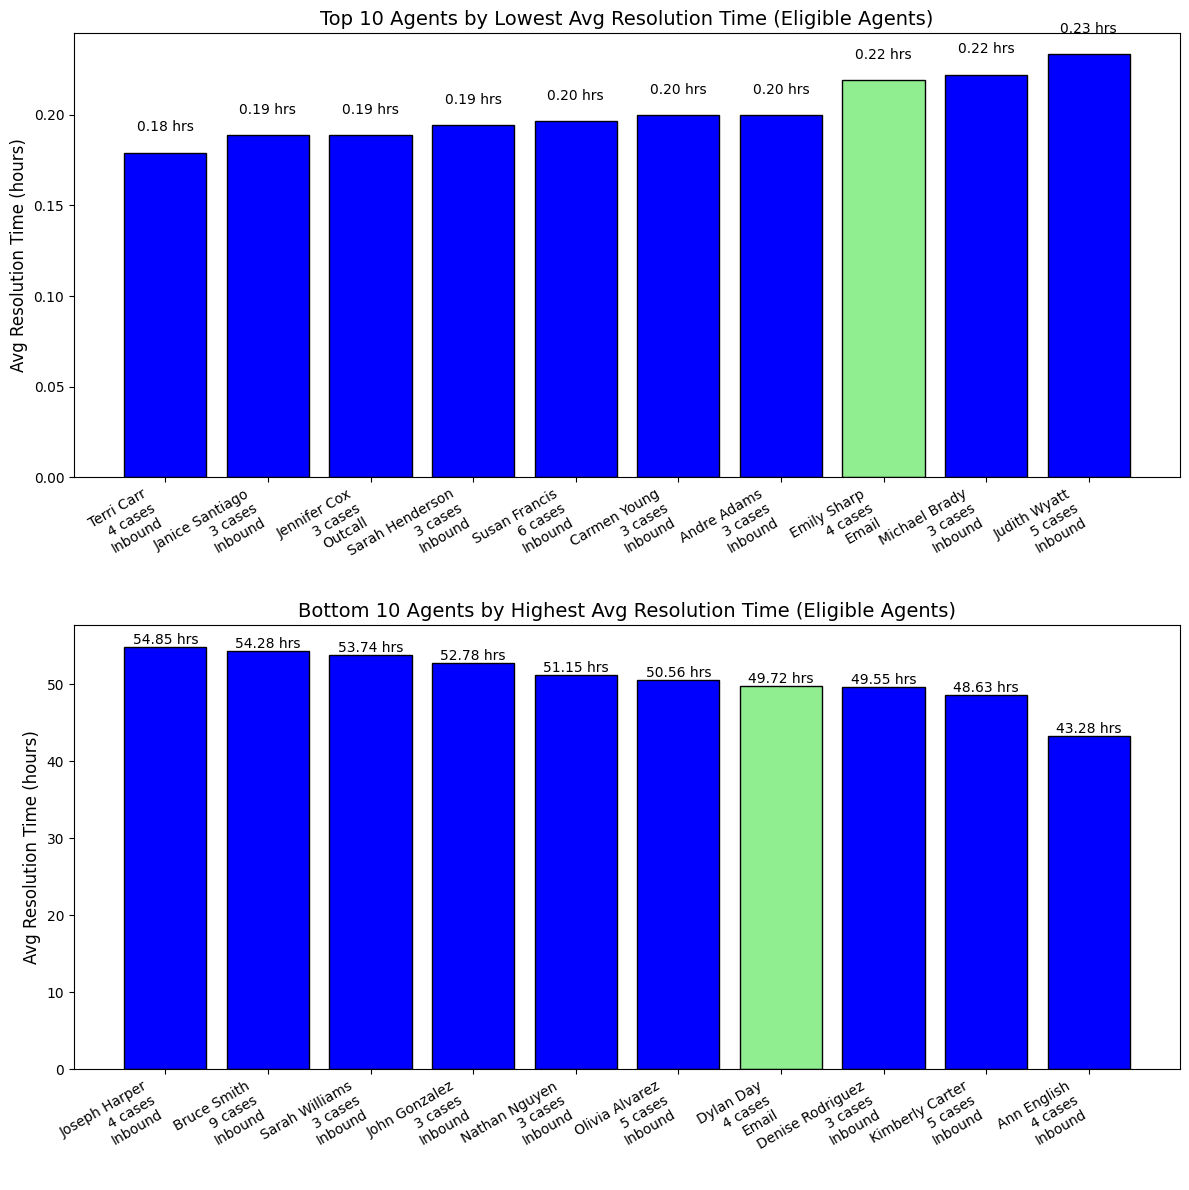

In [683]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by agent + channel to compute avg resolution time and total cases
performance_df = (
    df_prep
    .groupby(['agent_name', 'channel_name'])
    .agg(
        avg_resolution_time=('resolution_time', 'mean'),
        total_cases=('resolution_time', 'count')
    )
    .reset_index()
)

# Calculate the average number of cases handled by agents
avg_cases_handled = performance_df.groupby('agent_name')['total_cases'].sum().mean()

# Filter agents who have handled at least the average number of cases
eligible_agents = (
    performance_df
    .groupby('agent_name')['total_cases']
    .sum()
    .reset_index()
    .query('total_cases >= @avg_cases_handled')
    .agent_name
)

# Filter performance_df to only eligible agents
performance_eligible = performance_df[performance_df['agent_name'].isin(eligible_agents)]

# --- Top 10 Agents by Lowest Avg Resolution Time ---
top10_agents = (
    performance_eligible
    .groupby('agent_name')
    .agg(
        avg_resolution_time=('avg_resolution_time', 'mean'),
        total_cases=('total_cases', 'sum'),
        most_used_channel=('channel_name', lambda x: x.value_counts().idxmax())
    )
    .sort_values(by='avg_resolution_time', ascending=True)
    .head(10)
    .reset_index()
)

# --- Bottom 10 Agents by Highest Avg Resolution Time ---
bottom10_agents = (
    performance_eligible
    .groupby('agent_name')
    .agg(
        avg_resolution_time=('avg_resolution_time', 'mean'),
        total_cases=('total_cases', 'sum'),
        most_used_channel=('channel_name', lambda x: x.value_counts().idxmax())
    )
    .sort_values(by='avg_resolution_time', ascending=False)
    .head(10)
    .reset_index()
)

# --- Plot the two charts in one figure ---
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)

# --- Top 10 Agents Chart ---
axes[0].bar(
    top10_agents['agent_name'],
    top10_agents['avg_resolution_time'],
    color=[channel_colors.get(chan, 'blue') for chan in top10_agents['most_used_channel']],
    edgecolor='black'
)
# Add annotations for average resolution time
for i, row in top10_agents.iterrows():
    axes[0].text(
        i, row['avg_resolution_time'] + 0.01,
        f"{row['avg_resolution_time']:.2f} hrs",
        ha='center',
        va='bottom',
        fontsize=10
    )
# Customize x-axis labels
axes[0].set_xticks(range(len(top10_agents)))
axes[0].set_xticklabels(
    [f"{row['agent_name']}\n{row['total_cases']} cases\n{row['most_used_channel']}" for _, row in top10_agents.iterrows()],
    rotation=30,
    ha='right'
)
axes[0].set_title("Top 10 Agents by Lowest Avg Resolution Time (Eligible Agents)", fontsize=14)
axes[0].set_ylabel("Avg Resolution Time (hours)", fontsize=12)

# --- Bottom 10 Agents Chart ---
axes[1].bar(
    bottom10_agents['agent_name'],
    bottom10_agents['avg_resolution_time'],
    color=[channel_colors.get(chan, 'blue') for chan in bottom10_agents['most_used_channel']],
    edgecolor='black'
)
# Add annotations for average resolution time
for i, row in bottom10_agents.iterrows():
    axes[1].text(
        i, row['avg_resolution_time'] + 0.01,
        f"{row['avg_resolution_time']:.2f} hrs",
        ha='center',
        va='bottom',
        fontsize=10
    )
# Customize x-axis labels
axes[1].set_xticks(range(len(bottom10_agents)))
axes[1].set_xticklabels(
    [f"{row['agent_name']}\n{row['total_cases']} cases\n{row['most_used_channel']}" for _, row in bottom10_agents.iterrows()],
    rotation=30,
    ha='right'
)
axes[1].set_title("Bottom 10 Agents by Highest Avg Resolution Time (Eligible Agents)", fontsize=14)
axes[1].set_ylabel("Avg Resolution Time (hours)", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


- Top Performers: The top 10 agents demonstrate exceptional efficiency, with average resolution times ranging between 0.18 to 0.23 hours. Most agents predominantly handle inbound cases, showcasing their ability to manage high case volumes effectively.

- Low Performers: The bottom 10 agents exhibit significantly higher average resolution times, exceeding 43 hours. This highlights a potential need for training or process improvement, particularly for agents managing inbound cases, which dominate this group.

- Channel Dependency: The most-used channels (e.g., inbound) are consistent across both high and low performers, suggesting that performance differences may be attributed to individual efficiency or workload complexity rather than channel type.

In [582]:
df_prep.columns

Index(['channel_name', 'category', 'sub_category', 'customer_remarks',
       'order_date_time', 'issue_reported_at', 'issue_responded',
       'survey_response_date', 'customer_city', 'product_category',
       'item_price', 'agent_name', 'supervisor', 'manager', 'tenure_bucket',
       'agent_shift', 'csat_score', 'Issue_reported at',
       'Survey_response_Date', 'resolution_time', 'survey_delay', 'order_year',
       'order_month', 'Resolution_Time_Segment'],
      dtype='object')

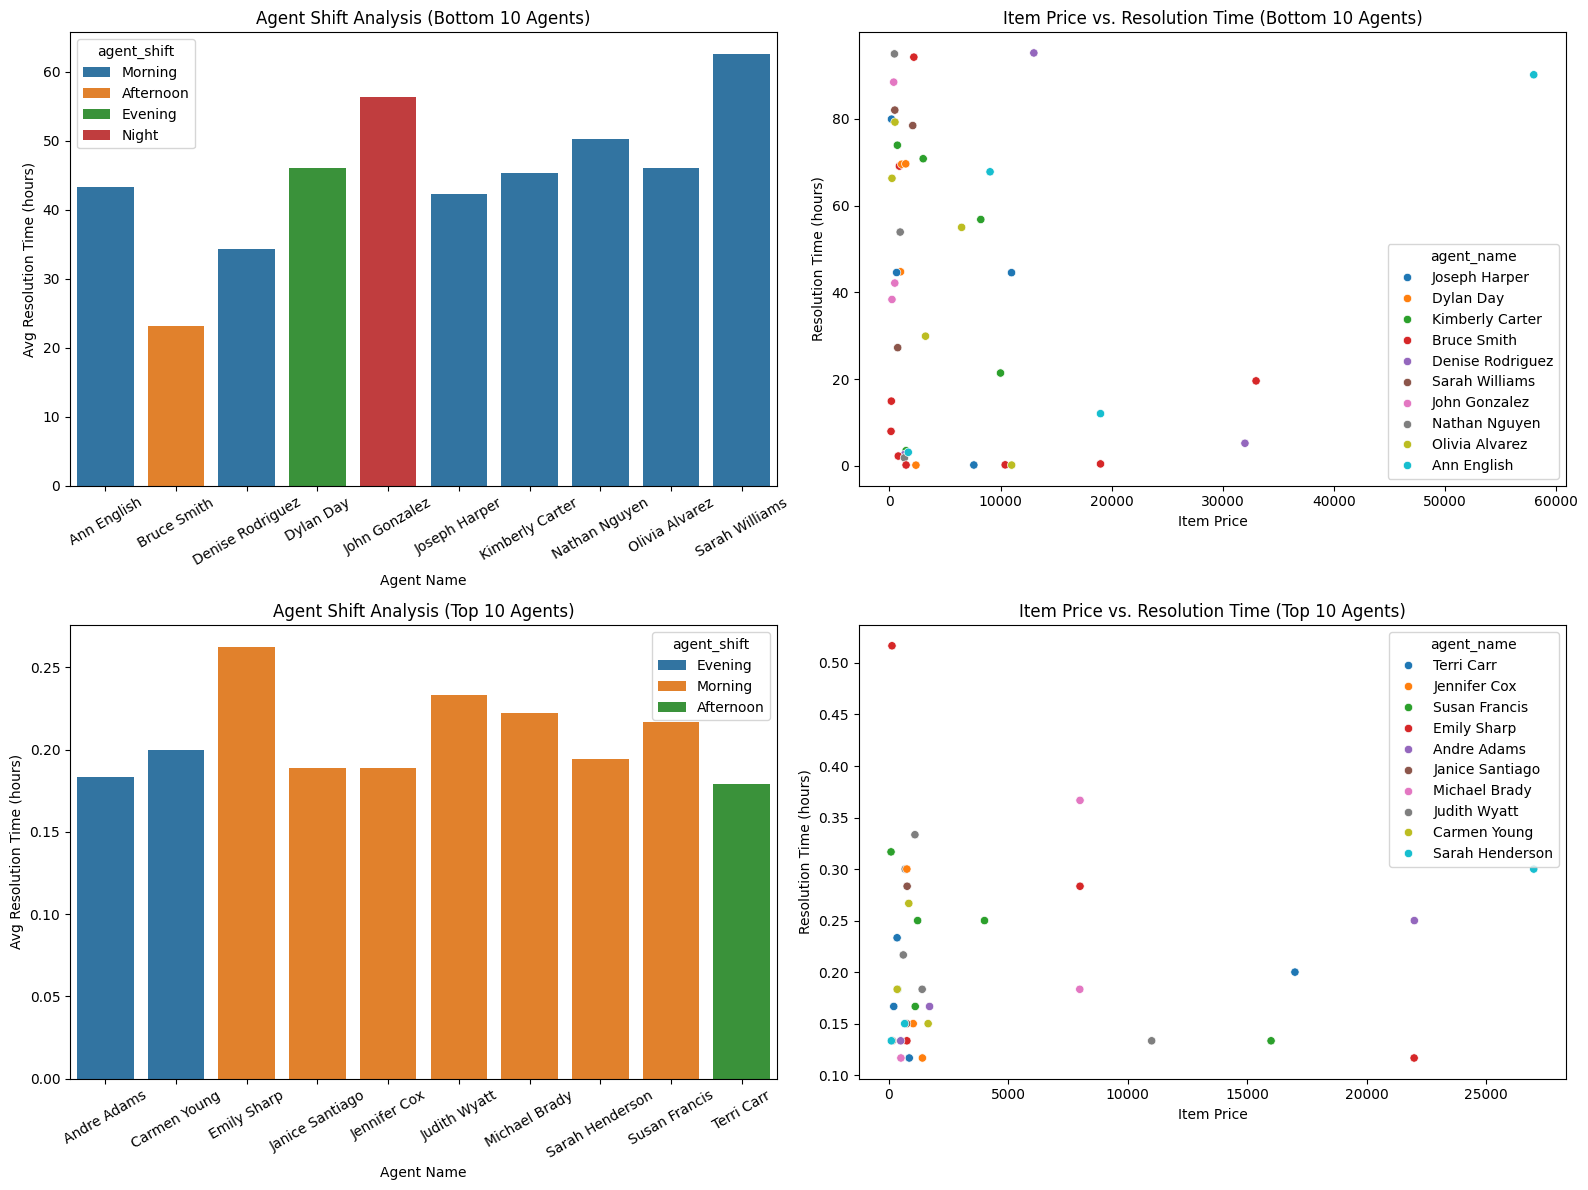

In [686]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

##############################################################################
# BOTTOM 10 AGENTS: Agent Shift Analysis
##############################################################################

# Group by agent + shift to get the mean resolution_time for bottom 10 agents
df_shift_bottom = (
    df_bottom10
    .groupby(['agent_name', 'agent_shift'])['resolution_time']
    .mean()
    .reset_index()
    .rename(columns={'resolution_time': 'avg_resolution_time'})
)

sns.barplot(
    x='agent_name', 
    y='avg_resolution_time', 
    hue='agent_shift', 
    data=df_shift_bottom, 
    ax=axes[0, 0]
)
axes[0, 0].set_title("Agent Shift Analysis (Bottom 10 Agents)", fontsize=12)
axes[0, 0].set_xlabel("Agent Name")
axes[0, 0].set_ylabel("Avg Resolution Time (hours)")
axes[0, 0].tick_params(axis='x', rotation=30)

##############################################################################
# BOTTOM 10 AGENTS: Item Price Analysis
##############################################################################

sns.scatterplot(
    x='item_price',
    y='resolution_time',
    hue='agent_name',           # optional: color points by agent
    data=df_bottom10,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Item Price vs. Resolution Time (Bottom 10 Agents)", fontsize=12)
axes[0, 1].set_xlabel("Item Price")
axes[0, 1].set_ylabel("Resolution Time (hours)")

##############################################################################
# TOP 10 AGENTS: Agent Shift Analysis
##############################################################################

# Group by agent + shift to get the mean resolution_time for top 10 agents
df_shift_top = (
    df_top10
    .groupby(['agent_name', 'agent_shift'])['resolution_time']
    .mean()
    .reset_index()
    .rename(columns={'resolution_time': 'avg_resolution_time'})
)

sns.barplot(
    x='agent_name', 
    y='avg_resolution_time', 
    hue='agent_shift', 
    data=df_shift_top, 
    ax=axes[1, 0]
)
axes[1, 0].set_title("Agent Shift Analysis (Top 10 Agents)", fontsize=12)
axes[1, 0].set_xlabel("Agent Name")
axes[1, 0].set_ylabel("Avg Resolution Time (hours)")
axes[1, 0].tick_params(axis='x', rotation=30)

##############################################################################
# TOP 10 AGENTS: Item Price Analysis
##############################################################################

sns.scatterplot(
    x='item_price',
    y='resolution_time',
    hue='agent_name',           # optional: color points by agent
    data=df_top10,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Item Price vs. Resolution Time (Top 10 Agents)", fontsize=12)
axes[1, 1].set_xlabel("Item Price")
axes[1, 1].set_ylabel("Resolution Time (hours)")

# Adjust layout and display
plt.tight_layout()
plt.show()


1. Agent Shift Impact:
  - Bottom 10 Agents: Night shifts show significantly higher resolution times, suggesting inefficiency during this period.
  - Top 10 Agents: Performance is consistent across shifts, indicating well-balanced efficiency among top performers.

2. Item Price and Resolution Time:
  -  Bottom 10 Agents: Resolution times increase significantly for high-priced items, pointing to complexity or additional handling requirements.
  - Top 10 Agents: Resolution times remain relatively stable across item price ranges, reflecting effective handling regardless of item value.

3. Performance Consistency:
  - Top agents maintain low resolution times across all metrics, while bottom agents exhibit wide variability, especially for higher item prices and night shifts. This highlights the need for better support or training during challenging conditions for bottom-performing agents.

### Which issue categories need improvement?

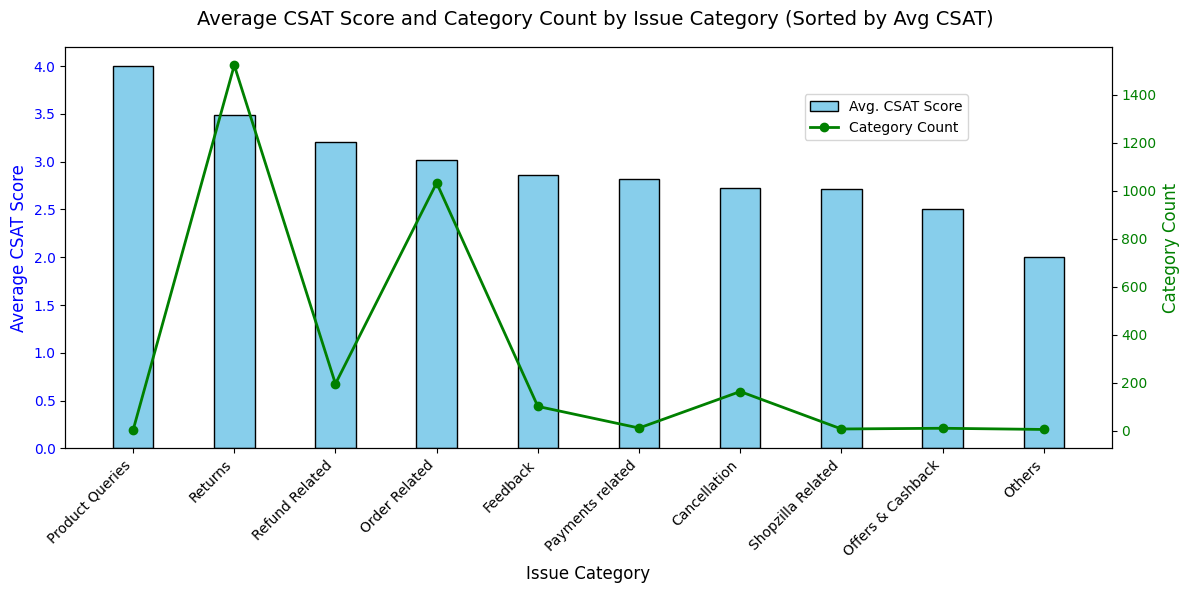

In [707]:
import matplotlib.pyplot as plt

# Group data by category and calculate the average CSAT score and category count
category_metrics = df_prep.groupby('category').agg({
    'csat_score': 'mean',  # Updated column name for CSAT Score
    'category': 'count'  # Count the number of occurrences for each category
}).rename(columns={'category': 'Count', 'csat_score': 'Avg_CSAT_Score'}).reset_index()

# Sort the categories by Avg_CSAT_Score
category_metrics = category_metrics.sort_values('Avg_CSAT_Score', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average CSAT scores
bar_width = 0.4
x = range(len(category_metrics['category']))
ax1.bar(x, category_metrics['Avg_CSAT_Score'], color='skyblue', width=bar_width, label='Avg. CSAT Score', edgecolor='black')
ax1.set_xlabel("Issue Category", fontsize=12)
ax1.set_ylabel("Average CSAT Score", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(category_metrics['category'], rotation=45, ha='right')

# Secondary y-axis for category count as a line chart
ax2 = ax1.twinx()
ax2.plot(
    x,
    category_metrics['Count'],
    color='green',
    marker='o',
    label='Category Count',
    linewidth=2
)
ax2.set_ylabel("Category Count", fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and legends
fig.suptitle("Average CSAT Score and Category Count by Issue Category (Sorted by Avg CSAT)", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.7, 0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


- High CSAT Scores for Product Queries and Returns: Product Queries and Returns have the highest average CSAT scores, indicating strong performance and customer satisfaction in these categories.

- Discrepancy in Counts and CSAT: Refund and Order Related categories show high counts but moderate CSAT scores, suggesting room for improvement in customer satisfaction for frequently occurring issues.

- Low Scores for Cancellation and Offers: Cancellation and Offers & Cashback categories have both low average CSAT scores and low counts, highlighting these as potential areas to prioritize for service improvements.

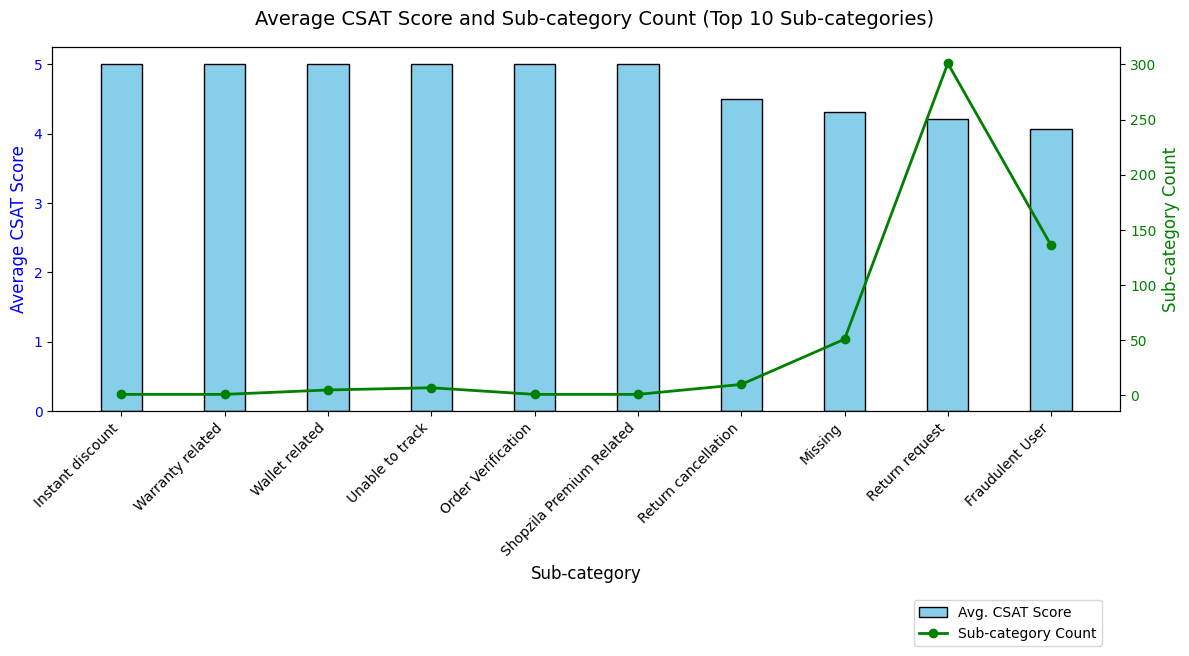

In [704]:
import matplotlib.pyplot as plt

# Limit the data to the top 10 subcategories based on average CSAT score
top_subcategories = subcategory_metrics.head(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average CSAT scores
bar_width = 0.4
x = range(len(top_subcategories['sub_category']))
ax1.bar(
    x,
    top_subcategories['Avg_CSAT_Score'],
    color='skyblue',
    width=bar_width,
    label='Avg. CSAT Score',
    edgecolor='black'
)
ax1.set_xlabel("Sub-category", fontsize=12)
ax1.set_ylabel("Average CSAT Score", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(top_subcategories['sub_category'], rotation=45, ha='right', fontsize=10)

# Secondary y-axis for sub_category count as a line chart
ax2 = ax1.twinx()
ax2.plot(
    x,
    top_subcategories['Count'],
    color='green',
    marker='o',
    label='Sub-category Count',
    linewidth=2
)
ax2.set_ylabel("Sub-category Count", fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and legends
fig.suptitle("Average CSAT Score and Sub-category Count (Top 10 Sub-categories)", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.8, -0.5), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


- Sub-categories such as "Instant discount," "Warranty-related," and "Wallet-related" consistently achieve the highest CSAT scores, indicating excellent customer satisfaction in these areas.

- "Return request" and "Fraudulent user" have the highest counts, suggesting they are the most common issues but may have varied CSAT performance.

- Sub-categories with lower counts, like "ShopShip Premium Related," maintain high CSAT scores, possibly reflecting well-handled specialized services.

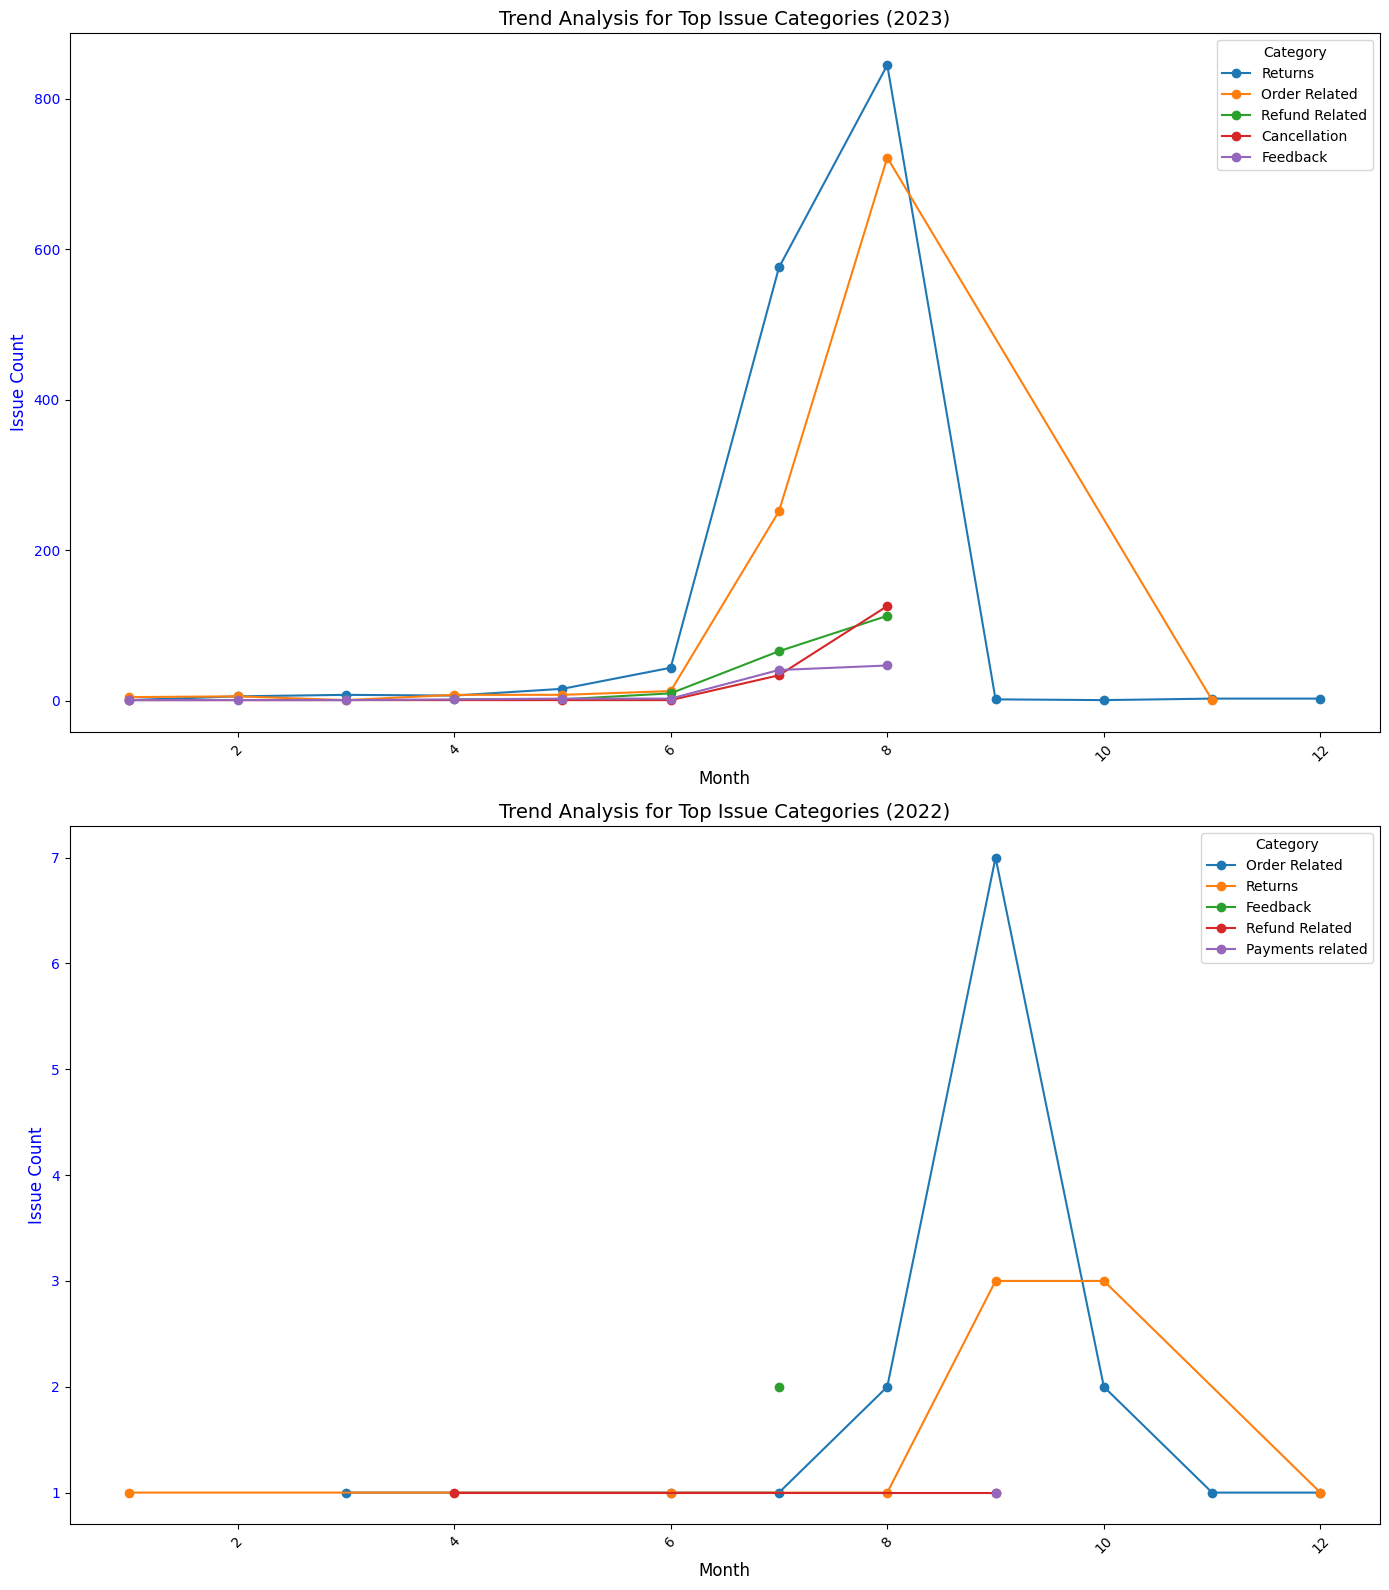

In [711]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by category and month, and calculate the count of issues
category_trends = df_prep.groupby(['category', 'order_year', 'order_month']).agg(
    Issue_Count=('csat_score', 'size')
).reset_index()

# Select categories with the highest issue counts for each year (e.g., top 5 categories per year)
top_issue_categories_2023 = (
    df_prep[df_prep['order_year'] == 2023]
    .groupby('category')['csat_score']
    .size()
    .nlargest(5)
    .index
)

top_issue_categories_2022 = (
    df_prep[df_prep['order_year'] == 2022]
    .groupby('category')['csat_score']
    .size()
    .nlargest(5)
    .index
)

# Filter trends for the high-issue-count categories for each year
category_trends_2023 = category_trends[
    (category_trends['category'].isin(top_issue_categories_2023)) & (category_trends['order_year'] == 2023)
]

category_trends_2022 = category_trends[
    (category_trends['category'].isin(top_issue_categories_2022)) & (category_trends['order_year'] == 2022)
]

# Create subplots for 2023 and 2022
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

##############################################################################
# SUBPLOT (TOP): Trend Analysis for 2023
##############################################################################

# Plot issue count trends for 2023
for category in top_issue_categories_2023:
    cat_data = category_trends_2023[category_trends_2023['category'] == category]
    ax1.plot(cat_data['order_month'], cat_data['Issue_Count'], marker='o', label=category)

ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Issue Count", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Trend Analysis for Top Issue Categories (2023)", fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="Category", fontsize=10)

##############################################################################
# SUBPLOT (BOTTOM): Trend Analysis for 2022
##############################################################################

# Plot issue count trends for 2022
for category in top_issue_categories_2022:
    cat_data = category_trends_2022[category_trends_2022['category'] == category]
    ax2.plot(cat_data['order_month'], cat_data['Issue_Count'], marker='o', label=category)

ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Issue Count", fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_title("Trend Analysis for Top Issue Categories (2022)", fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title="Category", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


- Dominant Categories: Returns and Order-Related issues consistently dominate the issue count in both 2023 and 2022, with significant mid-year spikes.

- Emerging Trends: Refund-Related issues show a steady rise during mid-year in 2023 but remain lower compared to the dominant categories.

- Low Volume Categories: Categories like Feedback, Cancellation, and Payments-Related remain consistently low, indicating they are not primary contributors to overall issues.

## Actionable Insights

- Leverage Strengths: Continue focusing on Product Queries and Returns categories to maintain high CSAT scores and reinforce customer satisfaction in these areas.

- Improve High-Volume Categories: Prioritize improving service for Refund and Order-Related issues, as their high occurrence and moderate CSAT scores highlight significant improvement opportunities.

- Address Low-Scoring Categories: Develop strategies to enhance customer satisfaction for Cancellation and Offers & Cashback categories, as their low CSAT scores indicate weak performance.

- Enhance Common Sub-Categories: Invest in improving processes for "Return request" and "Fraudulent user" issues to better handle the most frequent sub-categories effectively.

- Monitor Trends and Specialized Services: Closely track Refund-Related trends and ensure continued high performance for specialized sub-categories like "ShopShip Premium Related" to maintain excellence in niche areas.

### How does the choice of communication channel affect performance?

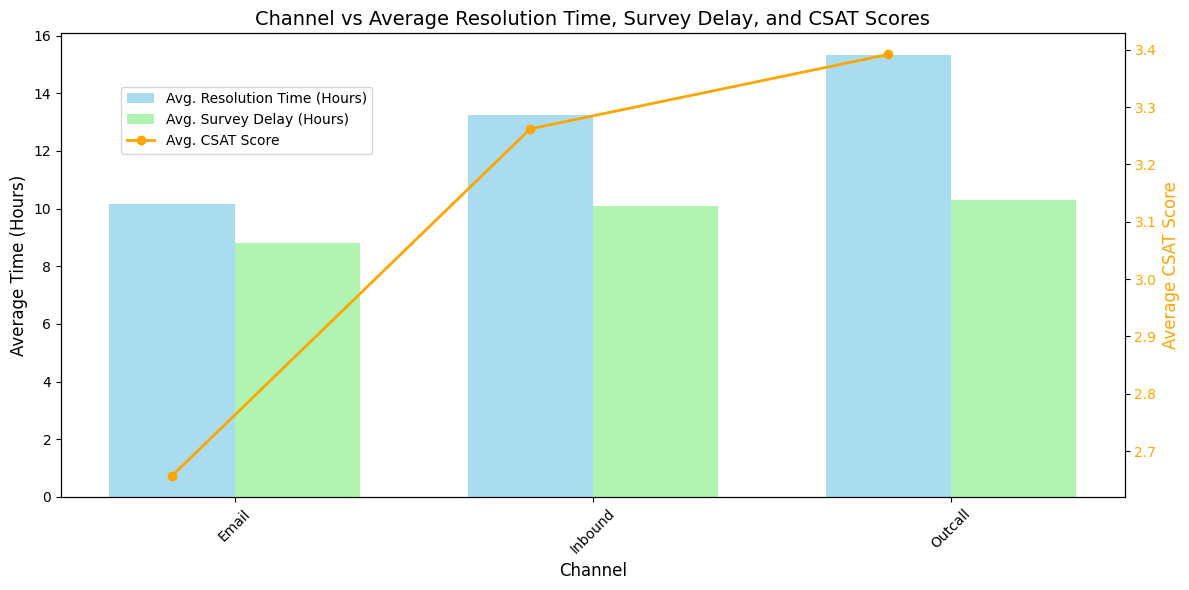

In [712]:
import matplotlib.pyplot as plt
import pandas as pd

# Exclude rows with negative survey_delay
df_filtered = df_prep[df_prep['survey_delay'] >= 0]

# Group data by channel and calculate the average resolution time, survey delay, and CSAT scores
channel_metrics = df_filtered.groupby('channel_name').agg({
    'resolution_time': 'mean',
    'survey_delay': 'mean',
    'csat_score': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average resolution time
bar_width = 0.35
x = range(len(channel_metrics['channel_name']))

ax1.bar(x, channel_metrics['resolution_time'], width=bar_width, color='skyblue', alpha=0.7, label='Avg. Resolution Time (Hours)')
ax1.bar(
    [pos + bar_width for pos in x], 
    channel_metrics['survey_delay'], 
    width=bar_width, 
    color='lightgreen', 
    alpha=0.7, 
    label='Avg. Survey Delay (Hours)'
)
ax1.set_xlabel("Channel", fontsize=12)
ax1.set_ylabel("Average Time (Hours)", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Channel vs Average Resolution Time, Survey Delay, and CSAT Scores", fontsize=14)
ax1.set_xticks([pos + bar_width / 2 for pos in x])
ax1.set_xticklabels(channel_metrics['channel_name'], rotation=45)

# Line plot for average CSAT scores
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(x, channel_metrics['csat_score'], color='orange', marker='o', label='Avg. CSAT Score', linewidth=2)
ax2.set_ylabel("Average CSAT Score", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.05, 0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


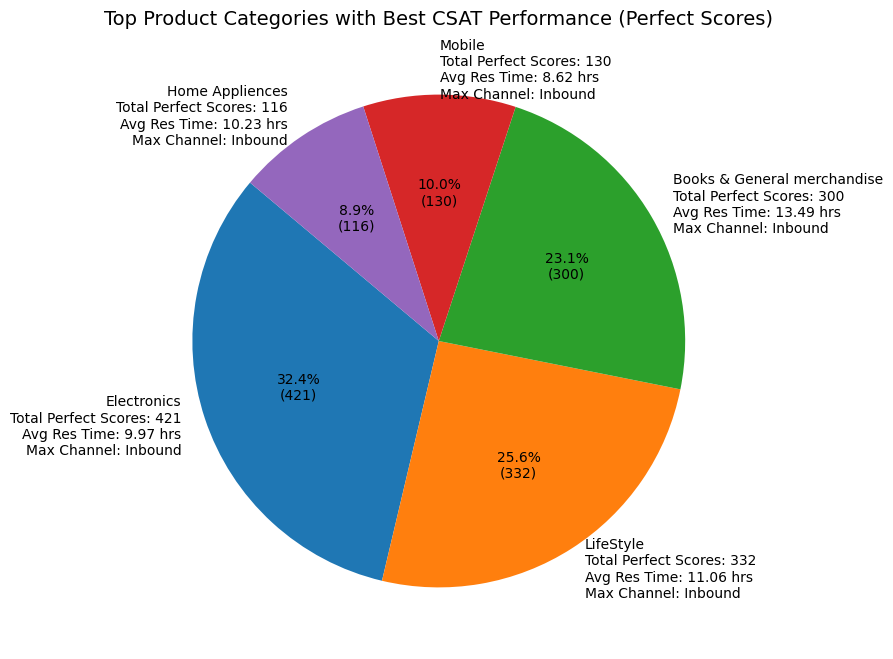

In [694]:
import matplotlib.pyplot as plt

# Filter data for perfect CSAT scores
perfect_csat = df_prep[df_prep['csat_score'] == 5]

# Count the number of perfect scores for each product category
category_csat_counts = perfect_csat['product_category'].value_counts()

# Select the top 5 categories with the highest counts of perfect scores
top_categories = category_csat_counts.head(5).index

# Calculate additional stats for top categories
category_stats = perfect_csat[perfect_csat['product_category'].isin(top_categories)].groupby('product_category').agg(
    total_scores=('product_category', 'size'),
    avg_resolution_time=('resolution_time', 'mean'),
    max_channel=('channel_name', lambda x: x.value_counts().idxmax())
).reindex(top_categories)

# Prepare labels with additional stats
labels = [
    f"{category}\nTotal Perfect Scores: {row.total_scores}\nAvg Res Time: {row.avg_resolution_time:.2f} hrs\nMax Channel: {row.max_channel}"
    for category, row in category_stats.iterrows()
]

# Plot a pie chart
plt.figure(figsize=(10, 8))

def autopct_with_count(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({absolute})'

plt.pie(
    category_stats['total_scores'],
    labels=labels,
    autopct=lambda pct: autopct_with_count(pct, category_stats['total_scores']),
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Top Product Categories with Best CSAT Performance (Perfect Scores)', fontsize=14)
plt.show()


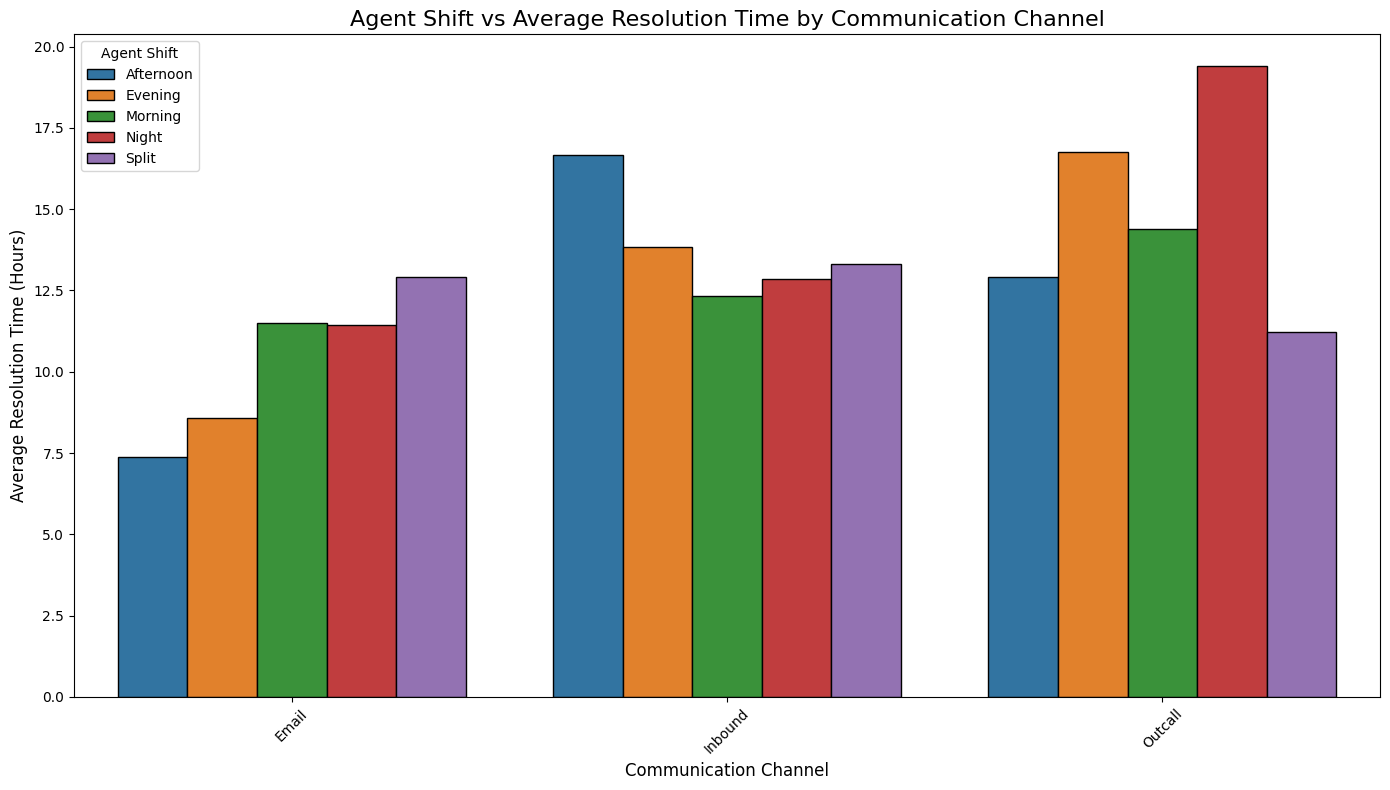

In [713]:
# Group data by channel and agent shift, and calculate average resolution time and CSAT score
channel_shift_metrics = df_prep.groupby(['channel_name', 'agent_shift']).agg(
    Avg_Resolution_Time=('resolution_time', 'mean'),
    Avg_CSAT_Score=('csat_score', 'mean')
).reset_index()

# Plotting grouped bar chart for Avg Resolution Time by Channel and Agent Shift
plt.figure(figsize=(14, 8))
sns.barplot(
    x='channel_name', 
    y='Avg_Resolution_Time', 
    hue='agent_shift', 
    data=channel_shift_metrics,
    edgecolor='black'
)

# Customizing the chart
plt.title("Agent Shift vs Average Resolution Time by Communication Channel", fontsize=16)
plt.xlabel("Communication Channel", fontsize=12)
plt.ylabel("Average Resolution Time (Hours)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Agent Shift", fontsize=10)
plt.tight_layout()
plt.show()


- Night Shift Variance: The night shift generally has higher average resolution times across all communication channels, indicating possible resource or efficiency challenges during late hours.

- Outcall Complexity: Outcall resolution times are consistently higher across all shifts, suggesting that issues handled via this channel may be more complex or require more time to address.

- Email Efficiency in the Morning: Email has the lowest average resolution time during the morning shift, indicating better performance and potentially more straightforward issues handled during this time.

### What trends can be observed in CSAT performance over time?

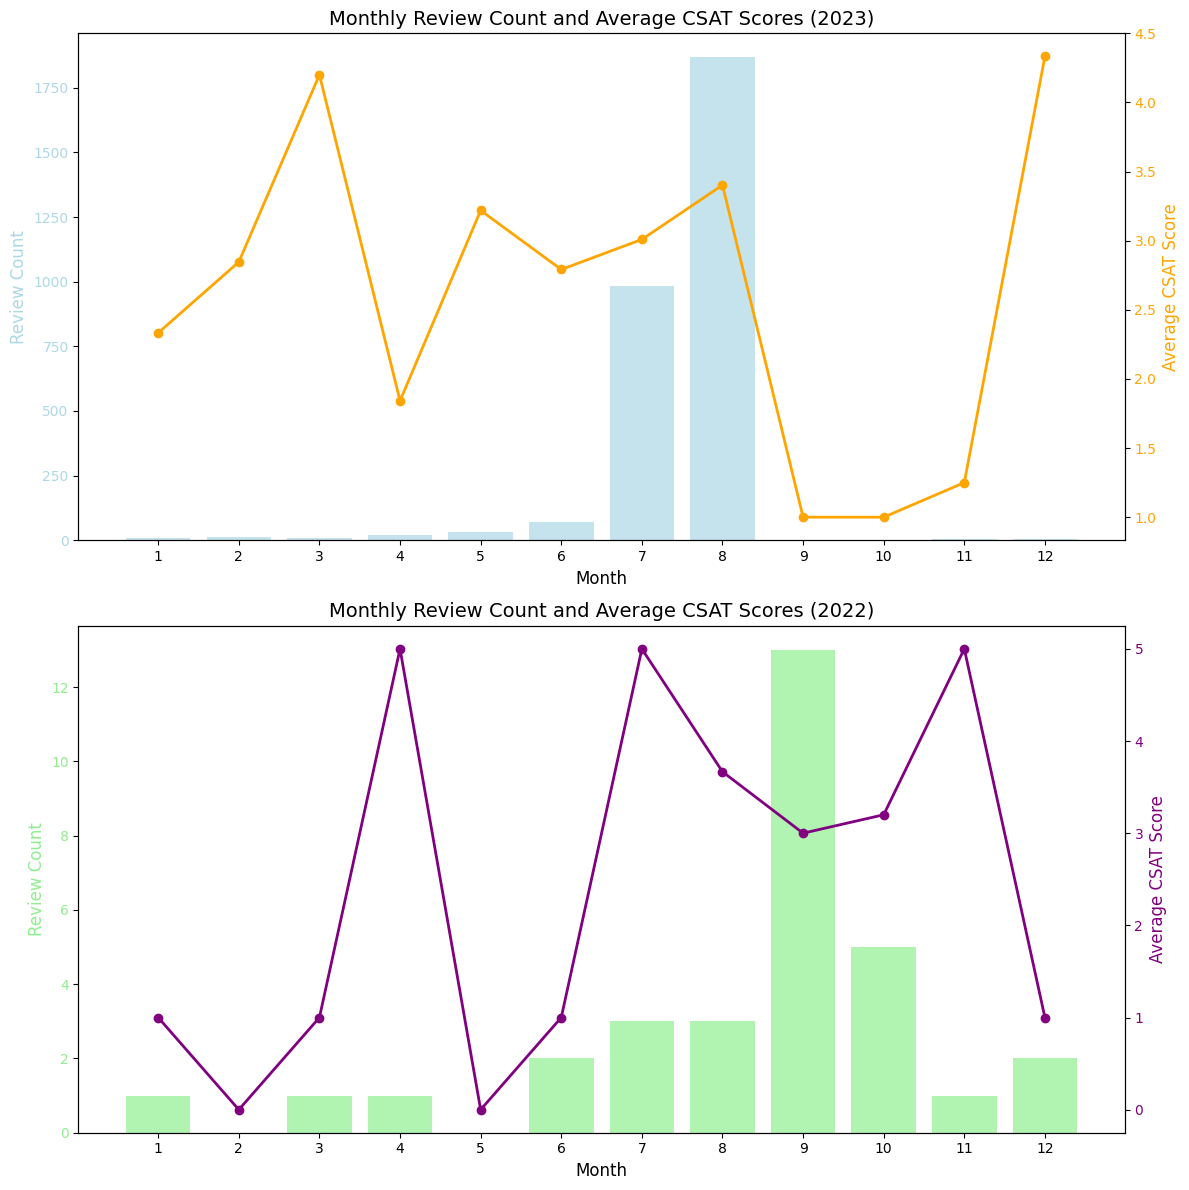

In [715]:
import matplotlib.pyplot as plt

# Ensure all months are included (fill in missing months with NaN or zero for review_count)
all_months = range(1, 13)

# Prepare data for 2023
monthly_metrics_2023 = (
    df_prep_2023.groupby('order_month')
    .agg(
        review_count=('csat_score', 'size'),
        avg_csat=('csat_score', 'mean')
    )
    .reindex(all_months, fill_value=0)  # Ensure all months are included
    .reset_index()
    .rename(columns={'order_month': 'Month'})
)

# Prepare data for 2022
monthly_metrics_2022 = (
    df_prep_2022.groupby('order_month')
    .agg(
        review_count=('csat_score', 'size'),
        avg_csat=('csat_score', 'mean')
    )
    .reindex(all_months, fill_value=0)  # Ensure all months are included
    .reset_index()
    .rename(columns={'order_month': 'Month'})
)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for 2023
color1 = 'lightblue'
ax1.bar(monthly_metrics_2023['Month'], monthly_metrics_2023['review_count'], color=color1, alpha=0.7, label='Review Count')
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Review Count", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Monthly Review Count and Average CSAT Scores (2023)", fontsize=14)
ax1.set_xticks(all_months)  # Show all months on the x-axis

# Line plot for average CSAT scores (2023)
color2 = 'orange'
ax1_2 = ax1.twinx()  # Create a secondary y-axis for 2023
ax1_2.plot(monthly_metrics_2023['Month'], monthly_metrics_2023['avg_csat'], color=color2, marker='o', linestyle='-', linewidth=2, label='Avg CSAT Score')
ax1_2.set_ylabel("Average CSAT Score", fontsize=12, color=color2)
ax1_2.tick_params(axis='y', labelcolor=color2)

# Plot for 2022
color1 = 'lightgreen'
ax2.bar(monthly_metrics_2022['Month'], monthly_metrics_2022['review_count'], color=color1, alpha=0.7, label='Review Count')
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Review Count", fontsize=12, color=color1)
ax2.tick_params(axis='y', labelcolor=color1)
ax2.set_title("Monthly Review Count and Average CSAT Scores (2022)", fontsize=14)
ax2.set_xticks(all_months)  # Show all months on the x-axis

# Line plot for average CSAT scores (2022)
color2 = 'purple'
ax2_2 = ax2.twinx()  # Create a secondary y-axis for 2022
ax2_2.plot(monthly_metrics_2022['Month'], monthly_metrics_2022['avg_csat'], color=color2, marker='o', linestyle='-', linewidth=2, label='Avg CSAT Score')
ax2_2.set_ylabel("Average CSAT Score", fontsize=12, color=color2)
ax2_2.tick_params(axis='y', labelcolor=color2)

# Adjust layout
plt.tight_layout()
plt.show()


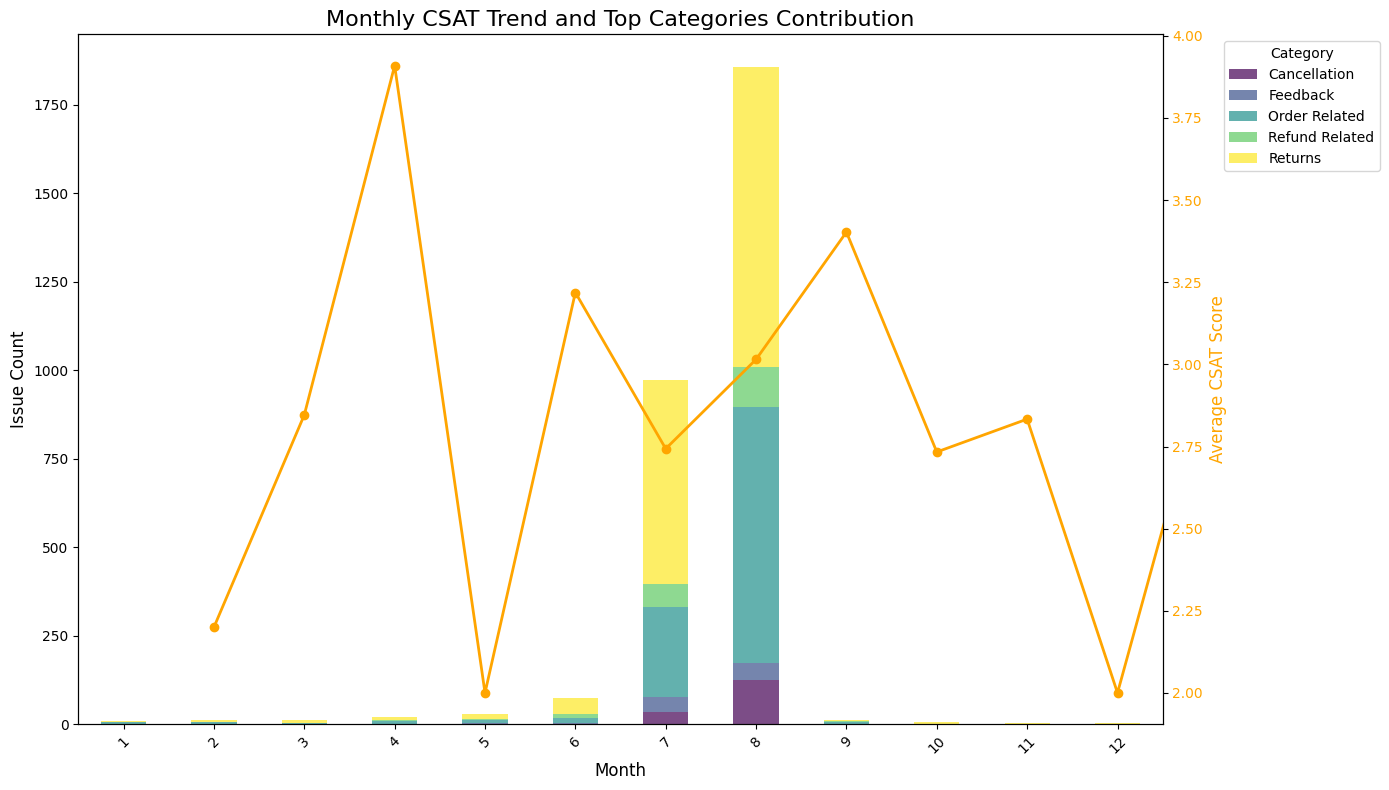

In [714]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Group data by category and month, and calculate CSAT and count metrics
category_monthly_metrics = df_prep.groupby(['order_month', 'category']).agg(
    Avg_CSAT=('csat_score', 'mean'),
    Issue_Count=('csat_score', 'size')
).reset_index()

# Overall monthly CSAT trend
monthly_csat_trend = df_prep.groupby('order_month').agg(
    Avg_CSAT=('csat_score', 'mean')
).reset_index()

# Select top categories contributing to issue count
top_categories = (
    df_prep.groupby('category')['csat_score']
    .count()
    .nlargest(5)
    .index
)

# Filter data for top categories
category_monthly_metrics_filtered = category_monthly_metrics[category_monthly_metrics['category'].isin(top_categories)]

# Pivot data for stacked bar chart
category_pivot = category_monthly_metrics_filtered.pivot(
    index='order_month', 
    columns='category', 
    values='Issue_Count'
).fillna(0)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Stacked bar chart for issue counts by category
category_pivot.plot(kind='bar', stacked=True, ax=ax1, alpha=0.7, colormap='viridis')
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Issue Count", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Line chart for overall monthly CSAT trend
ax2 = ax1.twinx()
ax2.plot(
    monthly_csat_trend['order_month'], 
    monthly_csat_trend['Avg_CSAT'], 
    color='orange', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Avg CSAT Score'
)
ax2.set_ylabel("Average CSAT Score", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and layout adjustments
plt.title("Monthly CSAT Trend and Top Categories Contribution", fontsize=16)
fig.tight_layout()
plt.show()


- Dominance of Returns Category: Returns consistently contribute the largest proportion of issue counts across multiple months, highlighting it as a key driver for CSAT trends.
- Seasonal Spikes: Significant peaks in issue counts occur mid-year and toward the end of the year, suggesting potential seasonal challenges or surges in demand.
- Stable Average CSAT: Despite fluctuations in issue counts, the average CSAT scores remain relatively stable, indicating effective handling of increased issues.


/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/1952832580.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_97269/1952832580.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


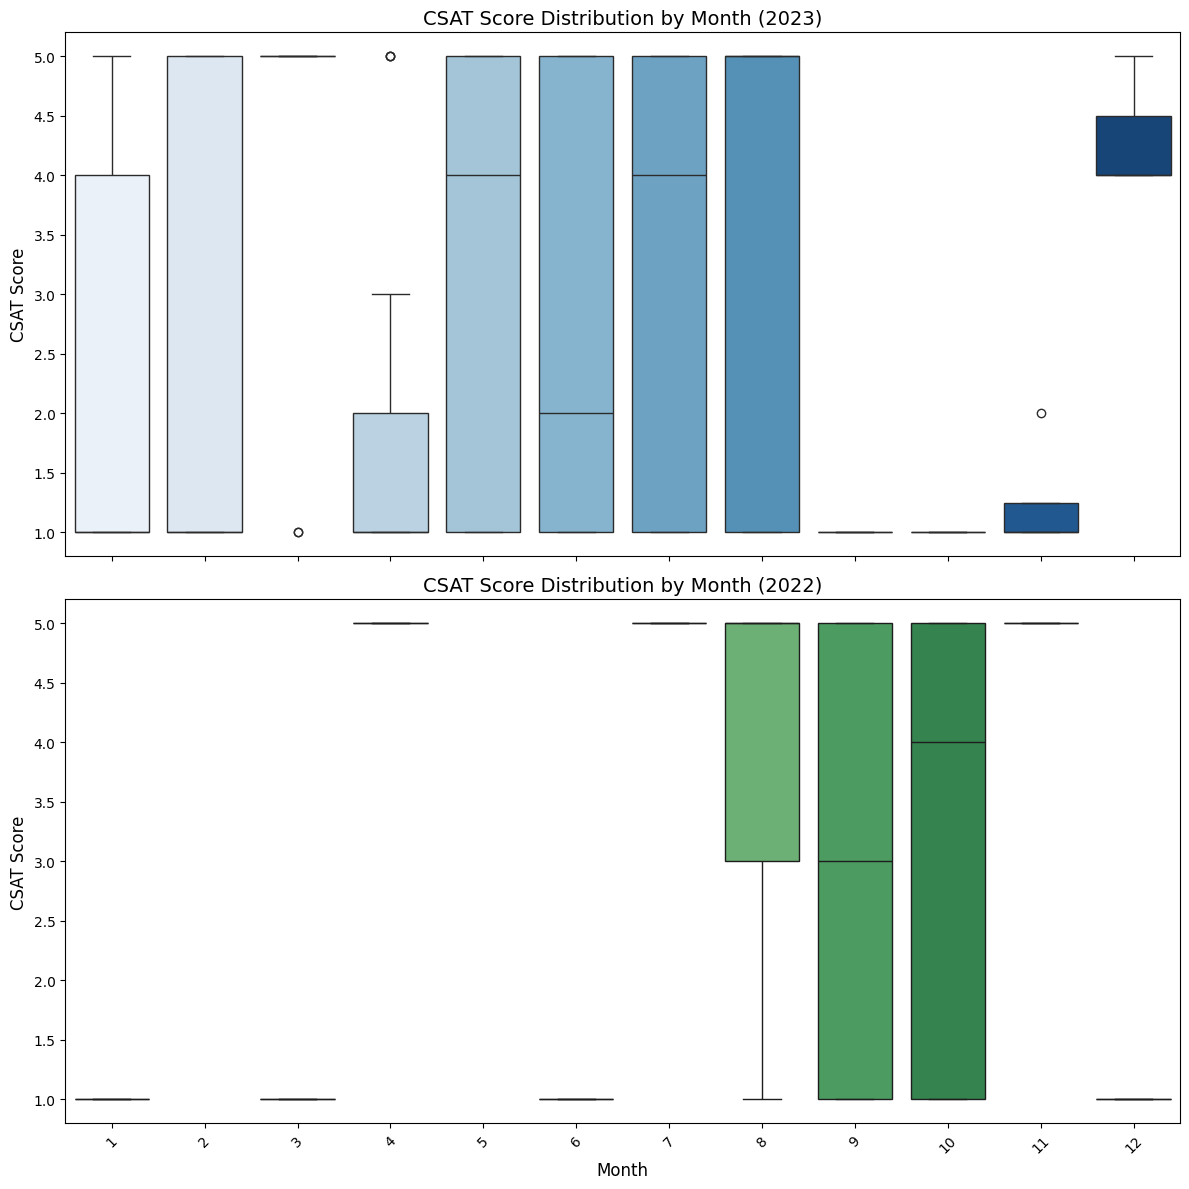

In [716]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for 2023
csat_2023 = df_prep[df_prep['order_year'] == 2023]

# Prepare data for 2022
csat_2022 = df_prep[df_prep['order_year'] == 2022]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Boxplot for 2023
sns.boxplot(
    x='order_month', 
    y='csat_score', 
    data=csat_2023, 
    ax=axes[0], 
    palette='Blues'
)
axes[0].set_title("CSAT Score Distribution by Month (2023)", fontsize=14)
axes[0].set_xlabel("Month", fontsize=12)
axes[0].set_ylabel("CSAT Score", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for 2022
sns.boxplot(
    x='order_month', 
    y='csat_score', 
    data=csat_2022, 
    ax=axes[1], 
    palette='Greens'
)
axes[1].set_title("CSAT Score Distribution by Month (2022)", fontsize=14)
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("CSAT Score", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


### 2023
- Wide Variability in April: CSAT scores exhibit the highest variability in April, indicating inconsistent customer experiences during this period.
- High Consistency Mid-Year: Months like July and August show tightly clustered scores, indicating a more uniform customer experience.
- Outliers in November: The low outliers in November suggest isolated cases of poor customer satisfaction.

### 2022
- Limited Data: The distribution is concentrated in specific months like September and October, suggesting reduced data or fewer issues throughout the year.
- High CSAT in Key Months: September and October display high and consistent CSAT scores, reflecting strong performance during these periods.
- Stable Trends: Minimal variability in most months indicates consistent service quality, albeit with a smaller dataset.